<a href="https://colab.research.google.com/github/julianadepaula/Projeto_Inadimplencia/blob/main/Projeto_de_Inadimpl%C3%AAncia_I_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##DESCRIÇÃO DO PROJETO

Neste projeto irei tratar e analisar dados relativos à inadimplência, traçando um perfil dos inadimplentes, utilizando algumas bibliotecas do Python e com o auxílio de tabelas e gráficos.

#DESCRIÇÃO DAS VARIÁVEIS


* id -> Número da conta

* default	-> Indica se o cliente é adimplente (0) ou inadimplente (1)

* idade	---

* sexo	---

* depedentes	---

* escolaridade	---

* estado_civil	---

* salario_anual ->	Faixa do salario mensal multiplicado por 12

* tipo_cartao ->	Categoria do cartao: blue, silver, gold e platinium

* meses_de_relacionamento	-> Quantidade de meses desde a abertura da conta

* qtd_produtos -> Quantidade de produtos contratados

* iteracoes_12m -> Quantidade de iteracoes com o cliente no último ano

* meses_inativo_12m -> Quantidade de meses que o cliente ficou inativo no último ano

* limite_credito -> Valor do limite do cartão de crédito

* valor_transacoes_12m ->	Soma total do valor das transações no cartão de crédito no último ano

* qtd_transacoes_12m ->	Quantidade total de transações no cartão de crédito no último ano

In [266]:
# Para importar as biliotecas do Python que serão utilizadas nas análises:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
# Para o Pandas ler o arquivo CSV:

pd.read_csv('credito.csv', sep= ',')

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [268]:
# Para atribuir os registros à variável 'df' e depois exibir os 10 primeiros registros:

# Para que o Pandas entenda que ele precisa considerar todos os registros que tiverem 'na' como valores nulos,
# usamos o na_values e atribuímos o 'na' ao na_values.
# Dessa forma, o Pandas transformará todos os registros 'na' no formato 'Nan'.

df = pd.read_csv('credito.csv', na_values = 'na')
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [269]:
# Para visualizar a quantidade total de clientes e dentre esse total
# a quantidade de adimplentes e inadimplentes e armazená-los nas suas respectivas variáveis:

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [270]:
# Para imprimir na tela essas quantidades acima e suas devidas proporções:

print(f'Quantidade total de Clientes: {qtd_total}\n')
print(f'Quantidade total de Clientes Adimplentes: {qtd_adimplentes}')
print(f"\t- A proporção clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%\n")
print(f'Quantidade total de Clientes Inadimplentes: {qtd_inadimplentes}')
print(f"\t- A proporção clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

Quantidade total de Clientes: 10127

Quantidade total de Clientes Adimplentes: 8500
	- A proporção clientes adimplentes é de 83.93%

Quantidade total de Clientes Inadimplentes: 1627
	- A proporção clientes inadimplentes é de 16.07%


Considerações:

Vemos, através do cálculo da proporção, que a porcentagem de Clientes Adimplentes é superior em relação à porcentagem dos Clientes Inadimplentes, entretanto, com o objetivo de reduzir a quantidade de inadimplência, mais à frente, irei traçar um perfil dos possíveis inadimplentes para efetiva mitigação do problema.

.

In [271]:
# Para visualizarmos as Estatísticas Descritivas desse DataFrame:

df.describe()

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


.

#Explorando as Estatísticas Descritivas





* **Estatísticas** **Descritivas** **Qualitativas**

In [272]:
# Para visualizarmos as Estatísticas Descritivas Qualitativas:

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


** Vendo a relação entre a inadimplência e cada uma das variáveis qualitativas

**INADIMPLÊNCIA** **X** **SEXO**

In [273]:
# Para ver a relação entre a inadimplência e sexo:

df = pd.DataFrame(df)


In [274]:
## Filtrar apenas as observações dos inadimplentes (default = 1):

inadimplentes = df[df['default'] == 1]

In [275]:
## Usando o método describe para obter estatísticas descritivas dos inadimplentes:

describe_inadimplentes = inadimplentes['sexo'].describe()
describe_inadimplentes

count     1627
unique       2
top          F
freq       930
Name: sexo, dtype: object

In [276]:
# Para obter a proporção de mulheres inadimplentes:

total_inadimplentes = len(inadimplentes)  # Total de inadimplentes

inadimplentes_feminino = len(inadimplentes[inadimplentes['sexo'] == 'F'])  # Total de inadimplentes do sexo feminino

proporcao_feminino = (inadimplentes_feminino / total_inadimplentes) * 100  # Calculando a proporção em porcentagem
proporcao_feminino


57.16041794714199

In [277]:
# Para fazer a análise gráfica da relação entre inadimplência e sexo:

import matplotlib.pyplot as plt
import seaborn as sns


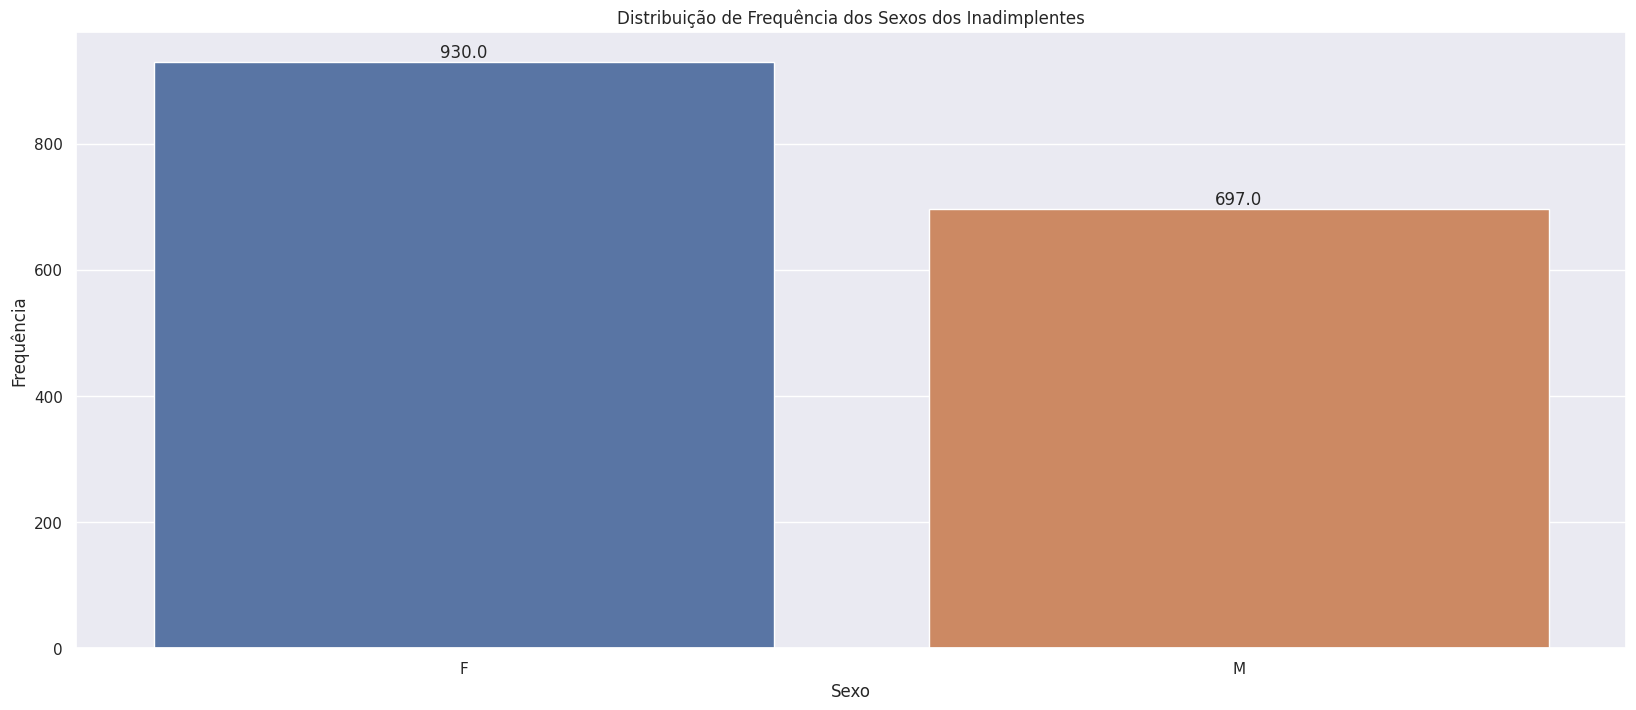

In [278]:
# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='sexo', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência dos Sexos dos Inadimplentes')
plt.xlabel('Sexo')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [279]:
df_inadimplentes['salario_anual'] = df_inadimplentes['salario_anual'].astype(float)

df_inadimplentes['salario_anual'].value_counts()

20.0     612
50.0     271
100.0    242
70.0     189
120.0    126
Name: salario_anual, dtype: int64

In [280]:
df['salario_anual'].value_counts()

menos que $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: salario_anual, dtype: int64

In [281]:
# Filtrar apenas os inadimplentes e atribuir a um novo DataFrame chamado 'df_inadimplentes':

df_inadimplentes = df[df['default'] == 1].copy()

In [282]:
# Converter a coluna 'salario_anual' dos inadimplentes para valores numéricos:

df_inadimplentes['salario_anual'] = df_inadimplentes['salario_anual'].apply(convert_salary)

In [283]:
# Calcular a média dos salários dos inadimplentes por sexo usando a função groupby:
media_salario_por_sexo_inadimplentes = df_inadimplentes.groupby('sexo')['salario_anual'].mean()

media_salario_por_sexo_inadimplentes

sexo
F    26.657754
M    84.393064
Name: salario_anual, dtype: float64

In [284]:
# Para calcular a porcentagem da diferença salarial anual das mulheres inadimplentes em relação aos homens inadimplentes:

salario_medio_feminino = df_inadimplentes[df_inadimplentes['sexo'] == 'F']['salario_anual'].mean()
salario_medio_masculino = df_inadimplentes[df_inadimplentes['sexo'] == 'M']['salario_anual'].mean()

diferenca_percentual = ((salario_medio_masculino - salario_medio_feminino) / salario_medio_masculino) * 100
diferenca_percentual


68.41238737088858

Vemos, com o 'top', que, dentre os inadimplentes, o sexo que mais se repete é o **Feminino(F)**, correspondendo a **57,16%** dos casos de inadimplência observados.
Uma das possíveis causas para essa ocorrência maior do sexo feminino entre os inadimplentes, é a desigualdade salarial entre gêneros.

De acordo com uma matéria do site G1 baseada na Pesquisa Nacional por Amostra de Domicílio(**PNAD**) de 2021 feita pelo IBGE, **mulheres** ganham em média **20,5%** **menos** que homens no Brasil.

Já na **população analisada**, em relação aos **inadimplentes**, esse percentual da diferença salarial(nesse caso anual) das mulheres em relação aos homens é ainda mais **expressivo**, correspondendo à 68,41% menos em relação aos homens de disparidade salarial anual.

Assim, com essa expressiva diferença, é possível inferir que com o salário mais baixo, as mulheres podem sentir um impacto maior desse desquilíbrio na área financeira, ficando mais inadimplentes com maior frequência se comparado aos homens.

Fonte: (https://g1.globo.com/dia-das-mulheres/noticia/2022/03/08/mulheres-ganham-em-media-205percent-menos-que-homens-no-brasil.ghtml)

.

**INADIMPLÊNCIA** **X** **ESCOLARIDADE**

In [285]:
# Para ver a relação entre a inadimplência e escolaridade:

describe_inadimplentes = inadimplentes['escolaridade'].describe()
describe_inadimplentes

count         1371
unique           5
top       mestrado
freq           487
Name: escolaridade, dtype: object

In [286]:
# Para verificar a quantidade total de registros de escolaridade 'mestrado' no DataFrame:

quantidade_mestrado = df['escolaridade'].value_counts()['mestrado']
quantidade_mestrado

3128

In [287]:
mestrado_df = df[df['escolaridade'] == 'mestrado']

In [288]:
# Para verificar dentre essa quantidade total quantos são do sexo feminino e quantas são do sexo masculino:

contagem_por_sexo = mestrado_df['sexo'].value_counts()
contagem_por_sexo

F    1670
M    1458
Name: sexo, dtype: int64

In [289]:
# Para verificarmos quantas pessoas das 487 pessoas que são inadimplentes e tem mestrado
# são mulheres(que são as mais frequentes nas inadimplencia) :

inadimplentes_mestrado = df[(df['default'] == 1) & (df['escolaridade'] == 'mestrado')]


In [290]:
## Contar o número total de inadimplentes com escolaridade 'mestrado' :

total_inadimplentes_mestrado = inadimplentes_mestrado.shape[0]
total_inadimplentes_mestrado

487

In [291]:
## Contar o número de mulheres inadimplentes com escolaridade 'mestrado':

mulheres_inadimplentes_mestrado = inadimplentes_mestrado[df['sexo'] == 'F'].shape[0]
mulheres_inadimplentes_mestrado


<ipython-input-291-ac55b4efba34>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mulheres_inadimplentes_mestrado = inadimplentes_mestrado[df['sexo'] == 'F'].shape[0]


293

In [292]:
# Para verificar a porcentagem de mulheres dentre os inadimplentes com metrado:

porcentagem_mulheres_inadimplentes_mestrado = (mulheres_inadimplentes_mestrado/total_inadimplentes_mestrado)*100
porcentagem_mulheres_inadimplentes_mestrado

60.16427104722793

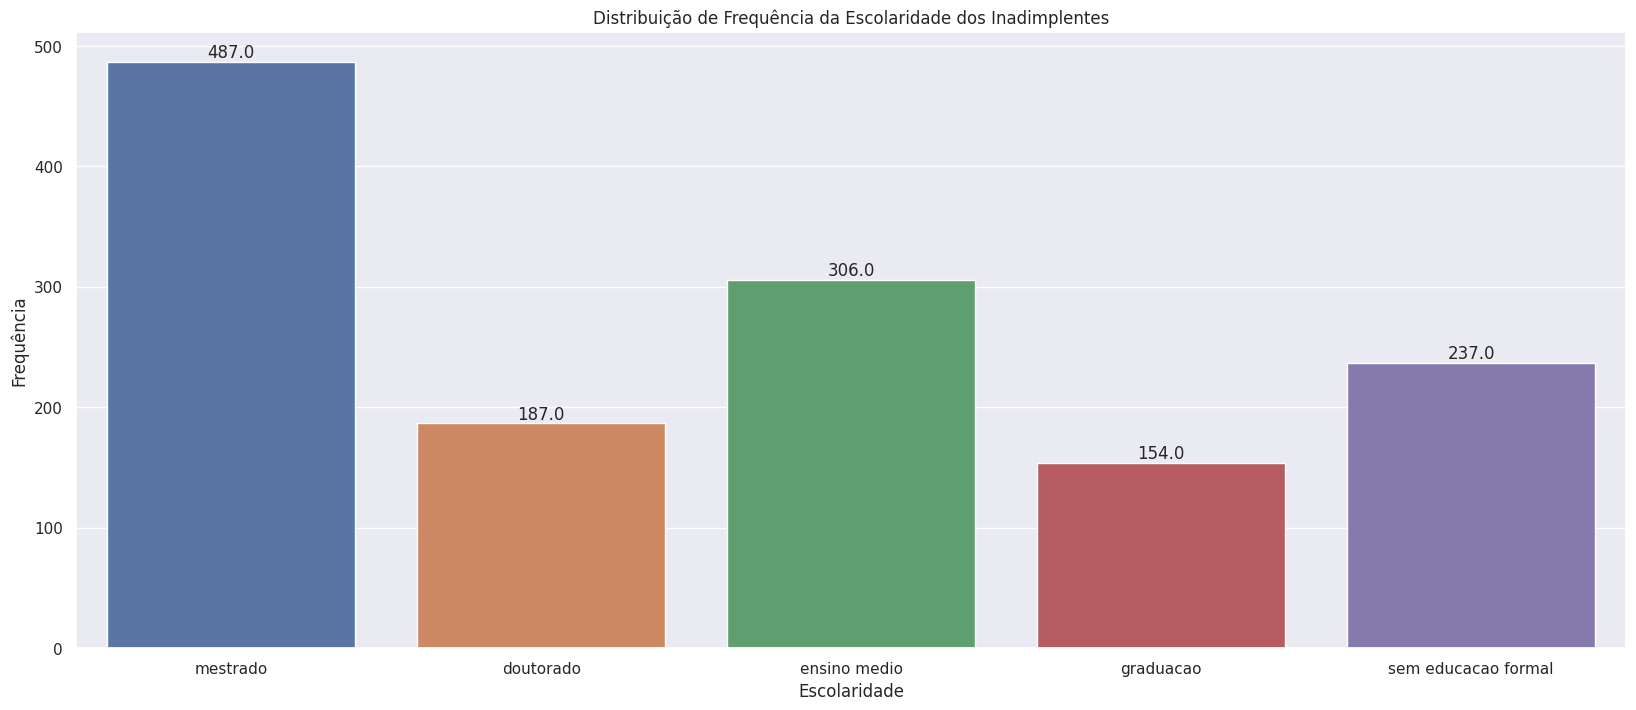

In [293]:
# Para fazer a análise gráfica da relação entre inadimplência e escolaridade:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))


## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='escolaridade', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Escolaridade dos Inadimplentes')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

Em relação à **escolaridade** que possui **maior frequência** em relação à **inadimplência** ser **mestrado**, inicialmente, esse fato pode causar certa estranheza, já que poderíamos esperar que quanto maior a escolaridade, menores poderiam ser as chances de estar inadimplente.

Entretanto, ao calcularmos quantos por cento dos **inadimplentes** que possuem **mestrado** e que são **mulheres**, verificamos um percentual bastante expressivo de **60,16%**, e de acordo com a matéria do **site G1**, ainda que as **mulheres possuam uma escolaridade mais alta**(o que também pode ser observado na população analisada neste projeto), elas **possuem um salário menor em relação aos homens.**

Portanto, com esses fatos, é possível deduzir, que, a partir dos dados observados, escolaridade mais baixa não tem relação direta com a inadimplência e que dentre a escolaridade mais frequente entre os inadimplentes(mestrado), predominam pessoas do sexo feminino, o que pode possivelmente ser explicado pelo fato das mulherem terem um salário mais baixo, mesmo tendo uma escolaridade mais alta se comparado aos homens, o que pode influenciar na saúde financeira destas e no cumprimento de suas obrigações financeiras.

Fonte: (https://g1.globo.com/dia-das-mulheres/noticia/2022/03/08/mulheres-ganham-em-media-205percent-menos-que-homens-no-brasil.ghtml)

.

**INADIMPLÊNCIA** **X** **ESTADO** **CIVIL**

In [294]:
# Para ver a relação entre inadimplência e estado civil:

describe_inadimplentes = inadimplentes['estado_civil'].describe()
describe_inadimplentes

count       1498
unique         3
top       casado
freq         709
Name: estado_civil, dtype: object

In [295]:
# Para verificar a porcentagem de individuos casados inadimplentes
# em relação ao total de registros  de inadimplentes da coluna estado civil:

casados_df = df[df['estado_civil'] == 'casado']


In [296]:
## Contar a quantidade de casados inadimplentes:

casados_inadimplentes = casados_df['default'].sum()
casados_inadimplentes

709

In [297]:
## Filtrar apenas as observações que são inadimplentes:

inadimplentes_df = df[df['default'] == 1]

In [298]:
# Contar o número total de inadimplentes:

total_inadimplentes = inadimplentes_df.shape[0]
total_inadimplentes

1627

In [299]:
porcentagem_casados_inadimplentes = (casados_inadimplentes / total_inadimplentes) * 100
porcentagem_casados_inadimplentes

43.57713583282114

In [300]:
# Para verificar a porcentagem de individuos solteiros inadimplentes
# em relação ao total de registros  de inadimplentes da coluna estado civil:

solteiros_df = inadimplentes[inadimplentes['estado_civil'] == 'solteiro']


In [301]:
## Contar a quantidade de solteiros inadimplentes:

solteiros_inadimplentes = solteiros_df['default'].sum()
solteiros_inadimplentes

668

In [302]:
porcentagem_solteiros_inadimplentes = (solteiros_inadimplentes/ total_inadimplentes) * 100
porcentagem_solteiros_inadimplentes

41.057160417947145

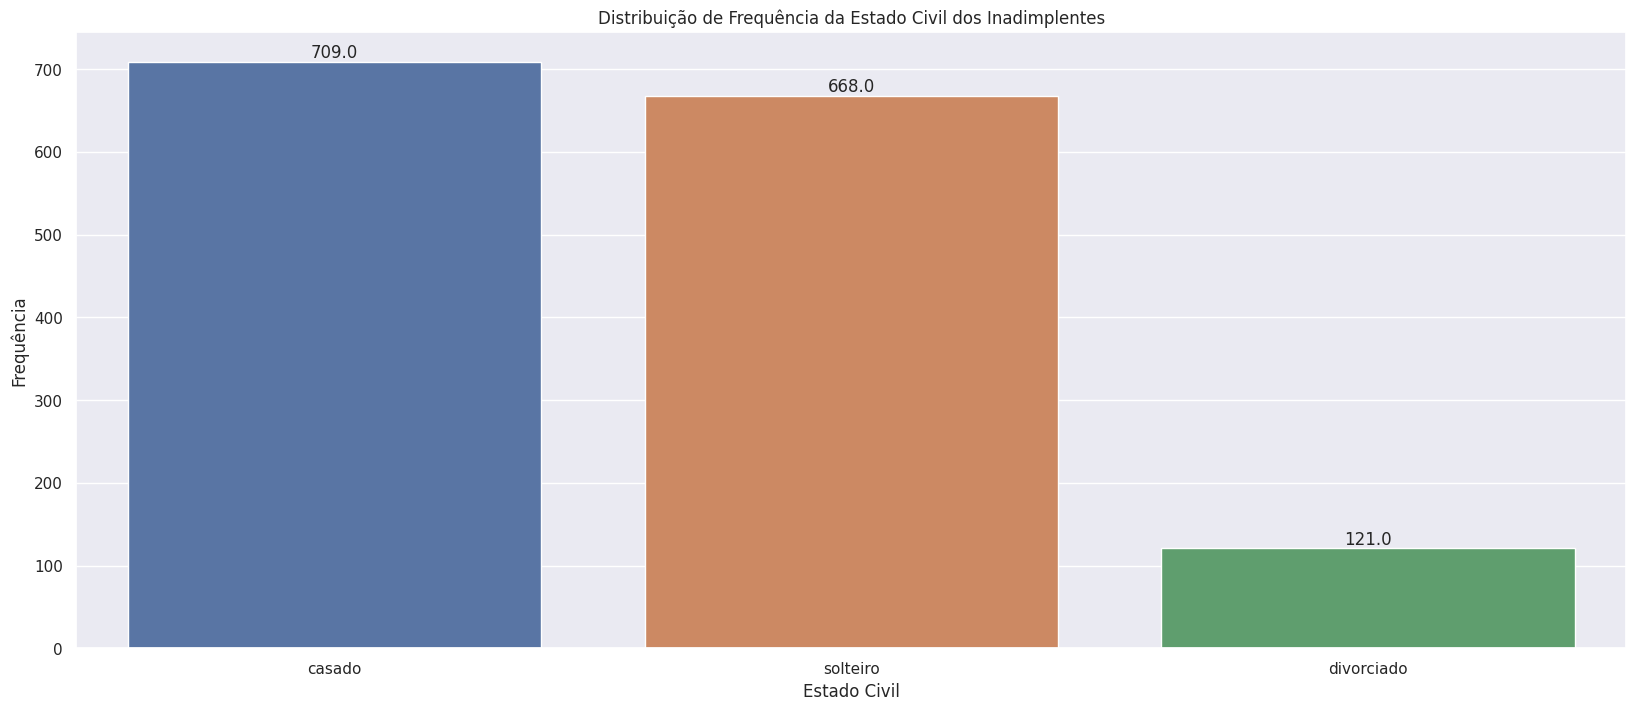

In [303]:
# Para fazer a análise gráfica da relação entre inadimplência e estado civil:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))


## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='estado_civil', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Estado Civil dos Inadimplentes')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

Ao observarmos o 'top' da variável 'estado_civil' relacionada à inadimplência, constamos que o estado civil mais frequente entre os inadimplentes é o '**casado**', representando um percentual de **43,58%**.

Um valor expressivo, entretanto,ao observar o gráfico, é possível notar que o estado civil '**solteiro**' também possui uma alta ocorrência na inadimplência, correspondendo a **41,05%** dos casos.

.

**INADIMPLÊNCIA** **X** **TIPO** **DE** **CARTÃO**

In [304]:
# Para ver a relação entre a inadimplência e tipo de cartão:

describe_inadimplentes = inadimplentes['tipo_cartao'].describe()
describe_inadimplentes

count     1627
unique       4
top       blue
freq      1519
Name: tipo_cartao, dtype: object

In [305]:
# Proporção da incidência do cartão 'blue' entre os inadimplentes em relação aos demais tipos:

total_inadimplentes = len(inadimplentes_df)
proporcao_blue = (inadimplentes_df['tipo_cartao'] == 'blue').sum() / total_inadimplentes * 100
proporcao_blue

93.3620159803319

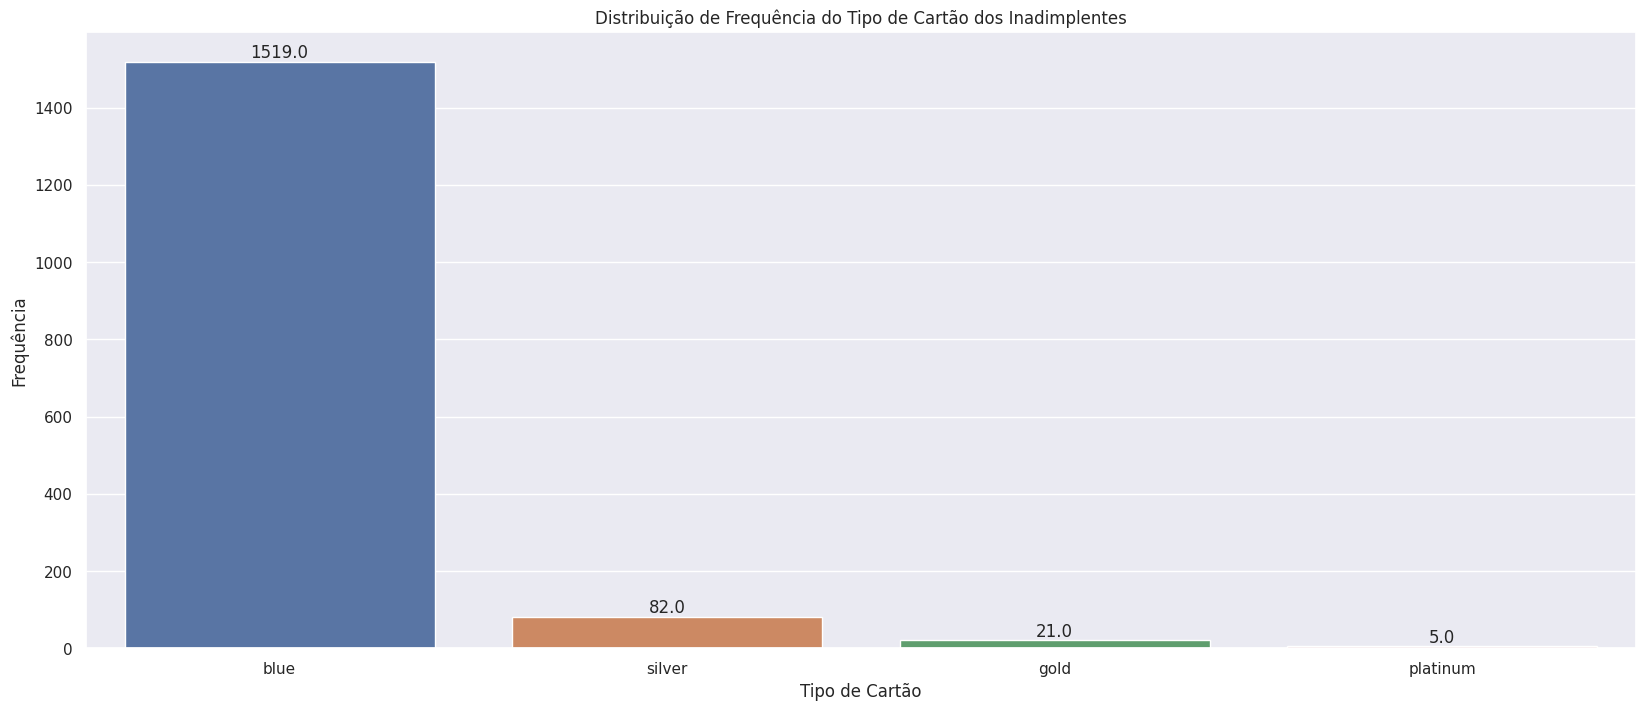

In [306]:
# Para fazer a análise gráfica da relação entre inadimplência e tipo de cartão:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))


## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='tipo_cartao', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência do Tipo de Cartão dos Inadimplentes')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

Como não temos maiores informações à respeito do critério que é utilizado para se adquirir cada tipo de cartão e suas condições de adquirência, não é possível inferir prováveis causas da incidência maior de inadimplência em determinado tipo de cartão mais frequente nesse cenário, sendo necessário investigar de forma mais aprofundada o cerne das motivações, após adquirir tais conhecimentos.

Entretanto, através do 'top' e da oservação do gráfico, é possível saber que o tipo '**blue**' é o mais **frequente** em termos de **inadimplência**, representando **93,36%** do total de ocorrências de inadimplência por tipo de cartão,
um valor bem alarmante que deve ser considerado no momento de ajustes para mitigação da inadimplência.

Com o objetivo de tentar entender melhor o perfil dos usuários do cartão do tipo 'blue', serão feitas análises mais aprofundadas a seguir.

In [307]:
# Para obter a faixa de idade dos inadimplentes que possuem o tipo de cartão blue:

# Filtrar os inadimplentes com tipo de cartão "blue"
inadimplentes_blue = inadimplentes[inadimplentes['tipo_cartao'] == 'blue']


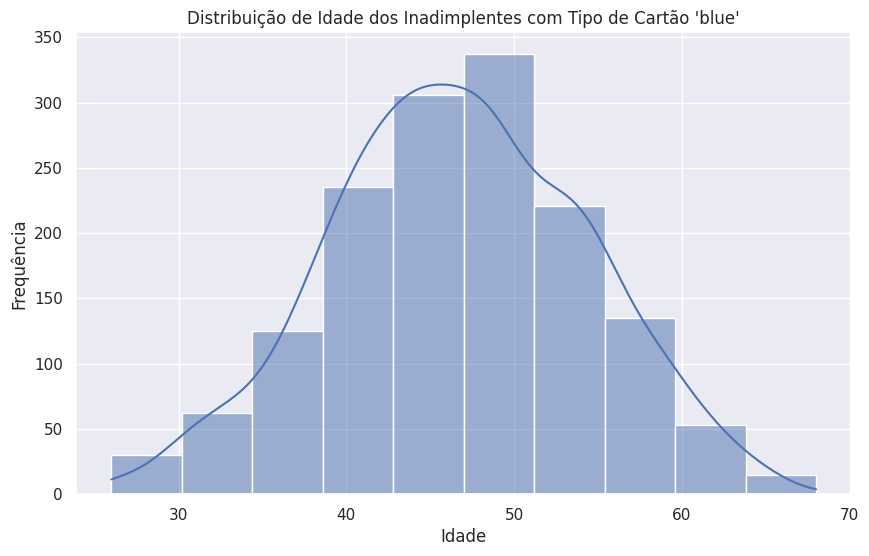

In [308]:
# Criar um histograma das idades

plt.figure(figsize=(10, 6))
sns.histplot(data=inadimplentes_blue, x='idade', bins=10, kde=True)
plt.title("Distribuição de Idade dos Inadimplentes com Tipo de Cartão 'blue'")
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Adicionar contagens nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

Observa-se pelo **gráfico** que, dos usuários **inadimplentes** que utilizam o cartão '**blue**', a faixa de **40 a 55 anos** de idade possui maior frequência.

.

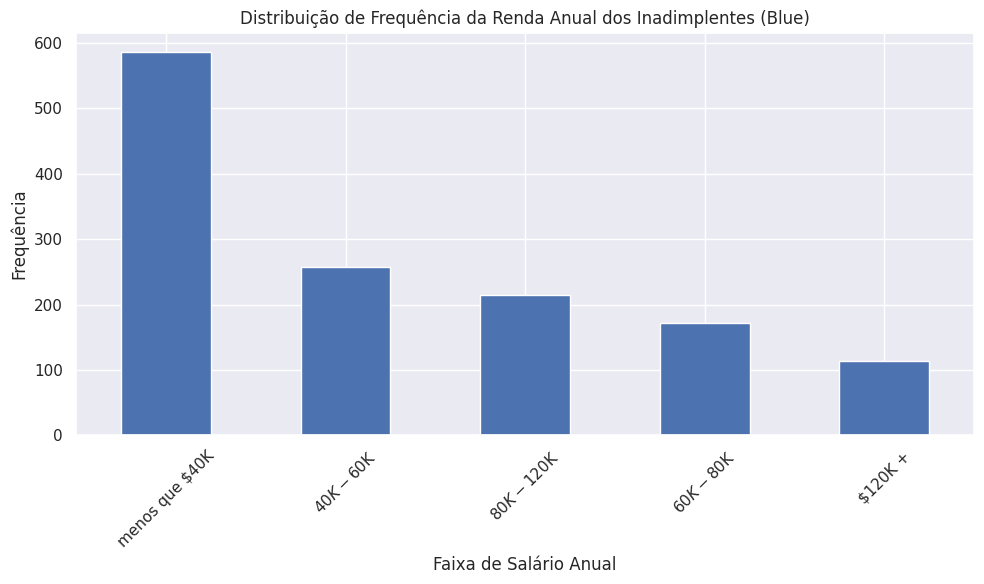

In [381]:
# Para obter a ocorrência de renda anual dos inadimplentes que usam o cartão blue:

plt.figure(figsize=(10, 6))
inadimplentes_blue['salario_anual'].value_counts().plot(kind='bar')
plt.xlabel('Faixa de Salário Anual')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência da Renda Anual dos Inadimplentes (Blue)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nota-se pelo **gráfico**, que a maior ocorrência de **renda** **anual** de **inadimplentes** que possuem o cartão '**blue**' são os que possuem salário anual no valor de **40.000,00**.

Dessa forma, é necessário ter mais cautela nos critérios de aprovação do cartão 'blue' relacionados à essa renda, recomendando-se, mudar a política de aprovação para a partir salários anuais acima de 40.000,00(quando podemos notar uma queda na inadimplência), sujeitos à uma análise de aprovação mais rigorosa, já que, pelo gráfico, após a queda em 40.000,00, há uma leve elevação na inadimplência, e, com a renda anual a partir de 80.000,00, pode-se ter uma aprovação com pouco menos de restrições.

.

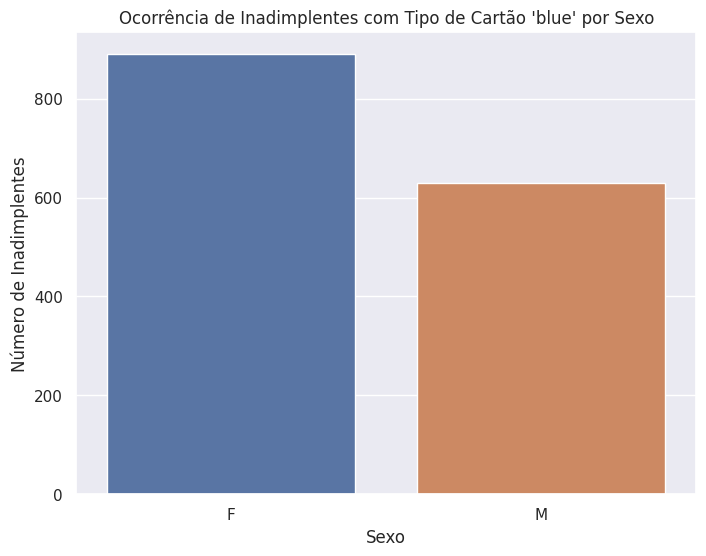

In [383]:
# Para obter a ocorrencia de inadimplentes que utilizem o cartão blue por sexo:

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=inadimplentes_blue, x='sexo')


plt.title("Ocorrência de Inadimplentes com Tipo de Cartão 'blue' por Sexo")
plt.xlabel('Sexo')
plt.ylabel('Número de Inadimplentes')
plt.show()

Pelo **gráfico**, nota-se uma ocorrência maior de **mulheres** **inadimplentes** que possuem o cartão '**blue**'.

.

TypeError: ignored

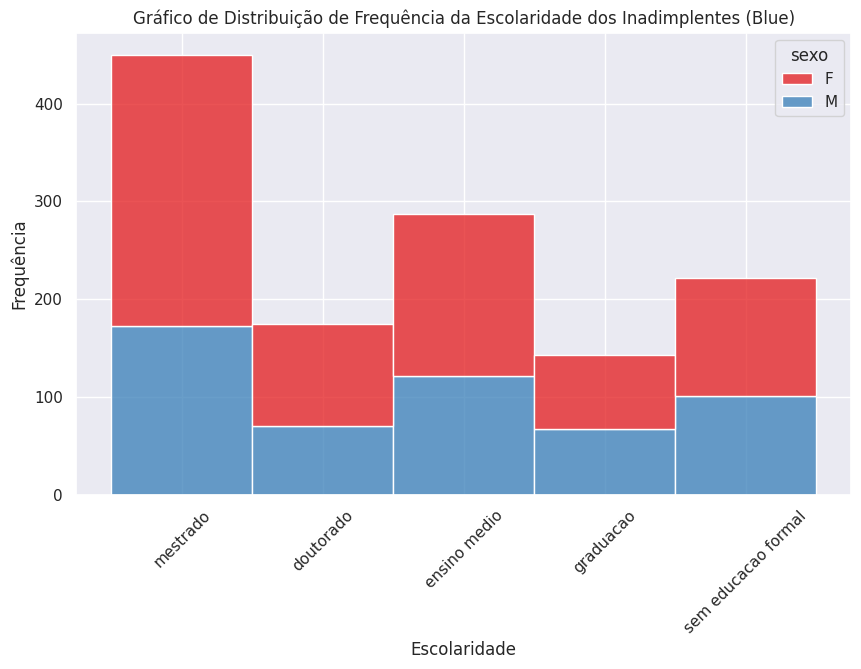

In [391]:
plt.figure(figsize=(10, 6))
sns.histplot(data=inadimplentes_blue, x='escolaridade', hue='sexo', multiple='stack', palette='Set1', element='bars')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.title('Gráfico de Distribuição de Frequência da Escolaridade dos Inadimplentes (Blue)')
plt.xticks(rotation=45)
plt.tight_layout(50)

# Adicionar legenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, ['Masculino', 'Feminino'], title='Sexo', loc='upper right')


plt.show()

Pelo **gráfico**, é possível notar que, em geral, dentre os adquirientes do cartão '**blue**', os indivíduos que possuem **mestrado** lideram na ocorrência de **inadimplência**, com maior ocorrência para as **mulheres**.

.

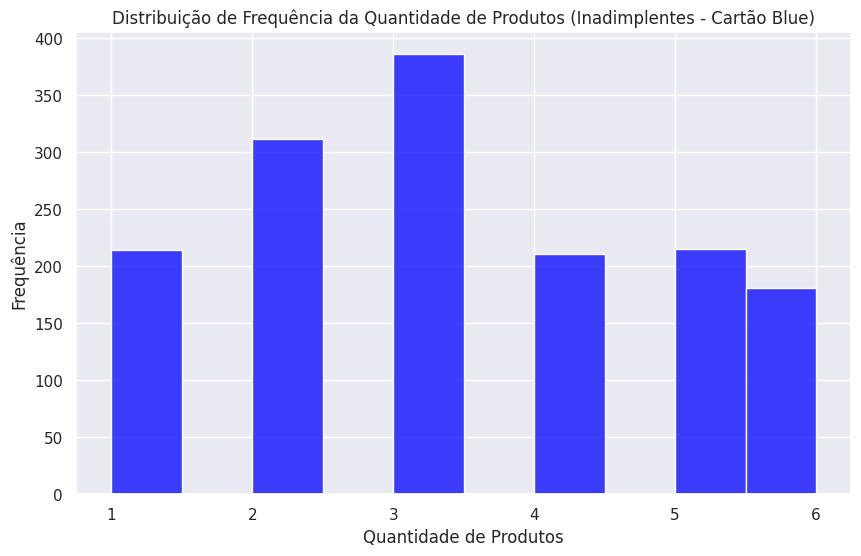

In [392]:
# Para obter a frequência da quantidade de produtos  dos inadimplentes que possuem o cartão blue:

# Criar o gráfico de distribuição de frequência da quantidade de produtos dos inadimplentes com o cartão 'blue'
plt.figure(figsize=(10, 6))  # Definir o tamanho do gráfico

# Criar o gráfico usando Seaborn
sns.histplot(data=inadimplentes_blue, x='qtd_produtos', bins=10, color='blue')

# Definir rótulos e título do gráfico
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência da Quantidade de Produtos (Inadimplentes - Cartão Blue)')

# Mostrar o gráfico
plt.show()

Como é possível observar no **gráfico**, a partir de **4** **produtos**, a ocorrência de **inadimplência** dentre os que possuem o cartão '**blue**' começa a **diminuir**.

Dessa forma, uma possível solução é a diminuição da taxa de juros a partir da adquirência de 4 produtos.

.

* **Estatísticas** **Descritivas** **Quantitativas**

In [309]:
# Para visualizarmos as Estatísticas Descritivas Quantitativas:

df.drop('id', axis=1).select_dtypes('number').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


.

Como a variável '**salario_anual**' está em faixas de valores e contém letras, ela foi classificada como tipo '**object**', entretanto, para conseguirmos analisá-la, iremos **desagregar as faixas de salário tirando a média entre o valor mínimo e valor máximo da faixa** e fixando essa média como o valor representante da faixa.


In [310]:
# Função para extrair os valores mínimos e máximos da faixa salarial:

def extract_salary_range(salary_range):
    match = re.findall(r'\d+', salary_range)
    if len(match) == 2:
        min_val, max_val = match
        return int(min_val), int(max_val)
    else:
        return None, None


In [311]:
df = pd.DataFrame(df)

.

**INADIMPLÊNCIA** **X** **SALÁRIO** **ANUAL**

In [312]:
# Para ver a relação entre inadimplência e salário anual:

## Filtrar apenas as observações que são inadimplentes:

inadimplentes_df = df[df['default'] == 1]

In [313]:
## Aplicando describe() na coluna 'salario_anual' dos inadimplentes:

describe_inadimplentes = inadimplentes_df['salario_anual'].describe()
describe_inadimplentes

count               1440
unique                 5
top       menos que $40K
freq                 612
Name: salario_anual, dtype: object

In [314]:
# Para saber o salário médio mensal dos inadimplentes:

salario_mensal_medio_inadimplentes = df_inadimplentes['salario_anual'].mean() / 12
salario_mensal_medio_inadimplentes

4.533564814814815

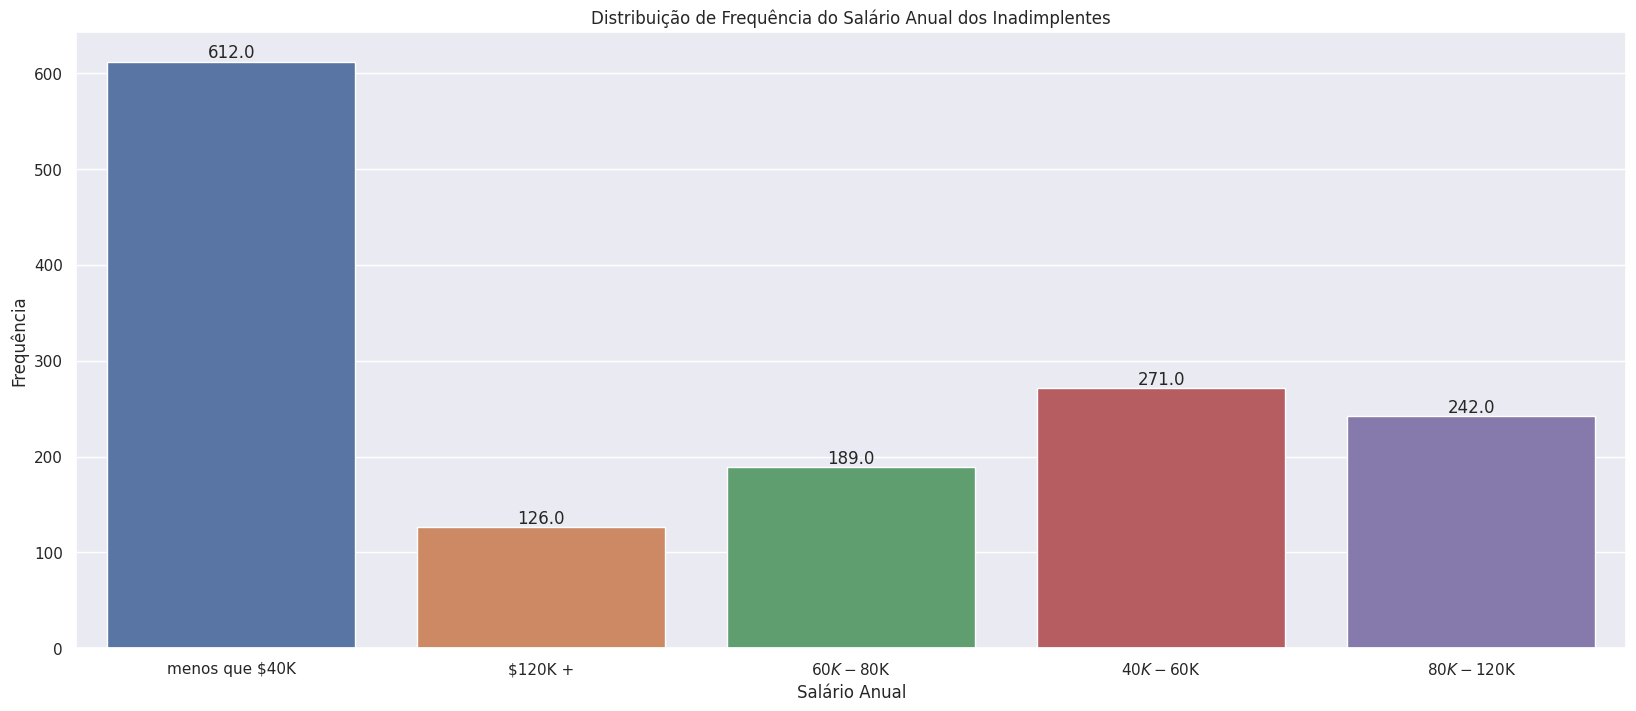

In [315]:
# Para fazer a análise gráfica da relação entre inadimplência e salário anual:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='salario_anual', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência do Salário Anual dos Inadimplentes')
plt.xlabel('Salário Anual')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

Ao visualizarmos as Estatísticas Descritivas relacionadas ao salário anual dos inadimplentes, constamos que a **média** **salarial** **anual** dos **inadimplentes** é de **54.402,28**, o que corresponde ao **salário médio mensa**l de **4.533,56**.

Também podemos observar em relação à **distribuição de frequências** que **50%** dos **inadimplentes** ganham um **salário anual** **abaixo** de **50.000,00**  - o que corresponde ao **salário mensal de até 4.166,66** - e 50% dos inadimplentes ganham um salário acima de R$ 50.000,00.

.

**INADIMPLÊNCIA** **X** **IDADE**

In [316]:
# Para ver a relação entre inadimplência e idade:

describe_inadimplentes = inadimplentes_df['idade'].describe()
describe_inadimplentes


count    1627.000000
mean       46.659496
std         7.665652
min        26.000000
25%        41.000000
50%        47.000000
75%        52.000000
max        68.000000
Name: idade, dtype: float64

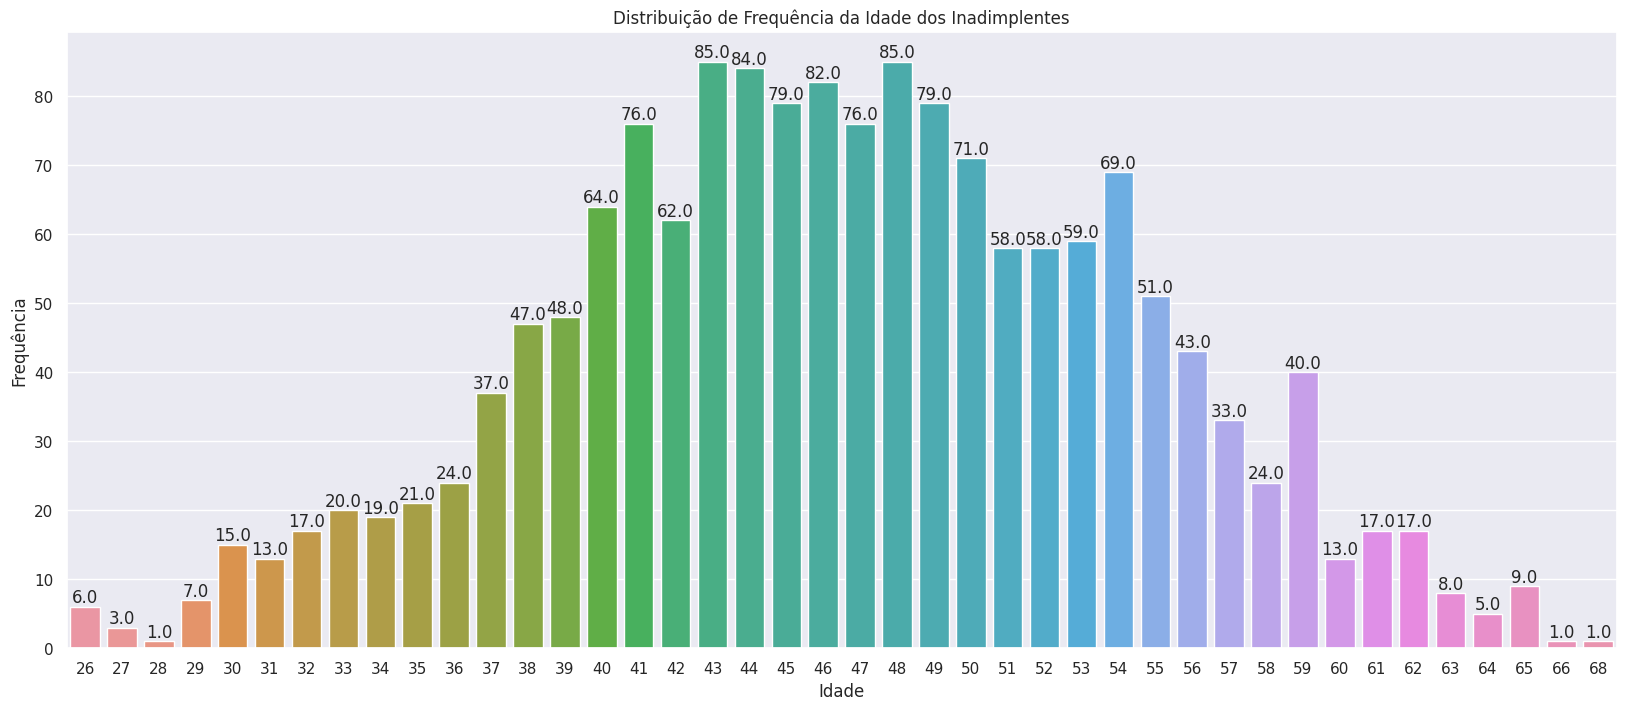

In [317]:
# Para fazer a análise gráfica da relação entre inadimplência e salário idade:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='idade', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Idade dos Inadimplentes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

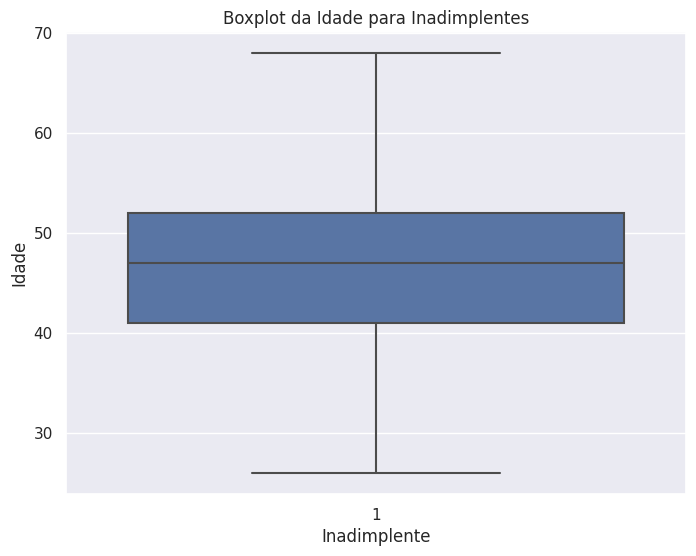

In [318]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes = df[df['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='idade', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot da Idade para Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Idade')

# Exibindo o gráfico
plt.show()

Através das Estatísticas Descritivas, é possível observar que a **média** de **idade** dos **inadimplentes** é de **46 anos**.

Através do **gráfico** é possível notar que a **faixa de idade** que possui maior **frequência** de **inadimplência** é a de 41 a 50 anos.

.

**INADIMPLÊNCIA** **X** **QUANTIDADE** **DE** **DEPENDENTES**

In [319]:
# Para ver a relação entre inadimplência e quantidade de dependentes:

describe_inadimplentes = inadimplentes_df['dependentes'].describe()
describe_inadimplentes

count    1627.000000
mean        2.402581
std         1.275010
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: dependentes, dtype: float64

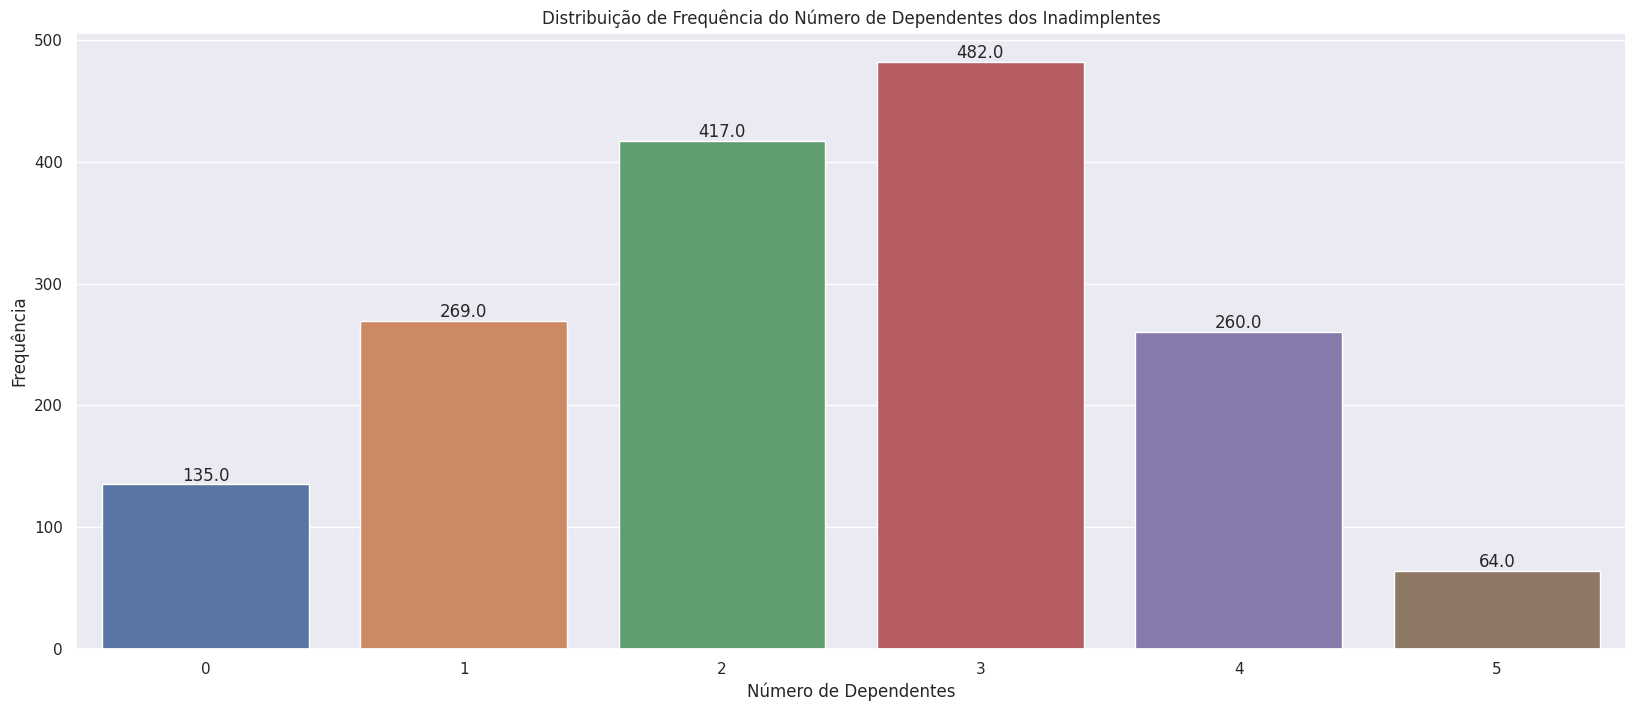

In [320]:
# Para fazer a análise gráfica da relação entre inadimplência e número de dependentes:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='dependentes', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência do Número de Dependentes dos Inadimplentes')
plt.xlabel('Número de Dependentes')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

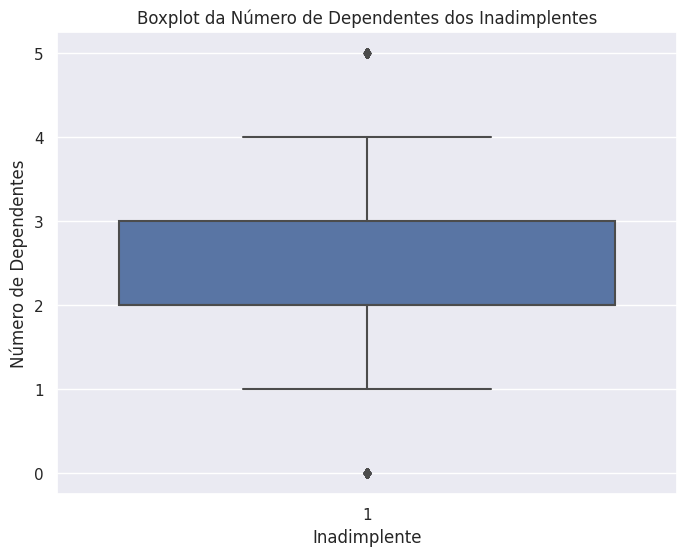

In [321]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes = df[df['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='dependentes', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot da Número de Dependentes dos Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Número de Dependentes')

# Exibindo o gráfico
plt.show()

Através das Estatísticas Descritivas acima, observa-se que os **inadimplentes** possuem em **média** 2 dependentes.

.

**INADIMPLÊNCIA** **X** **MESES** **DE** **RELACIONAMENTO**

In [322]:
# Para ver a relação entre inadimplência e meses de relacionamento:

describe_inadimplentes = inadimplentes_df['meses_de_relacionamento'].describe()
describe_inadimplentes

count    1627.000000
mean       36.178242
std         7.796548
min        13.000000
25%        32.000000
50%        36.000000
75%        40.000000
max        56.000000
Name: meses_de_relacionamento, dtype: float64

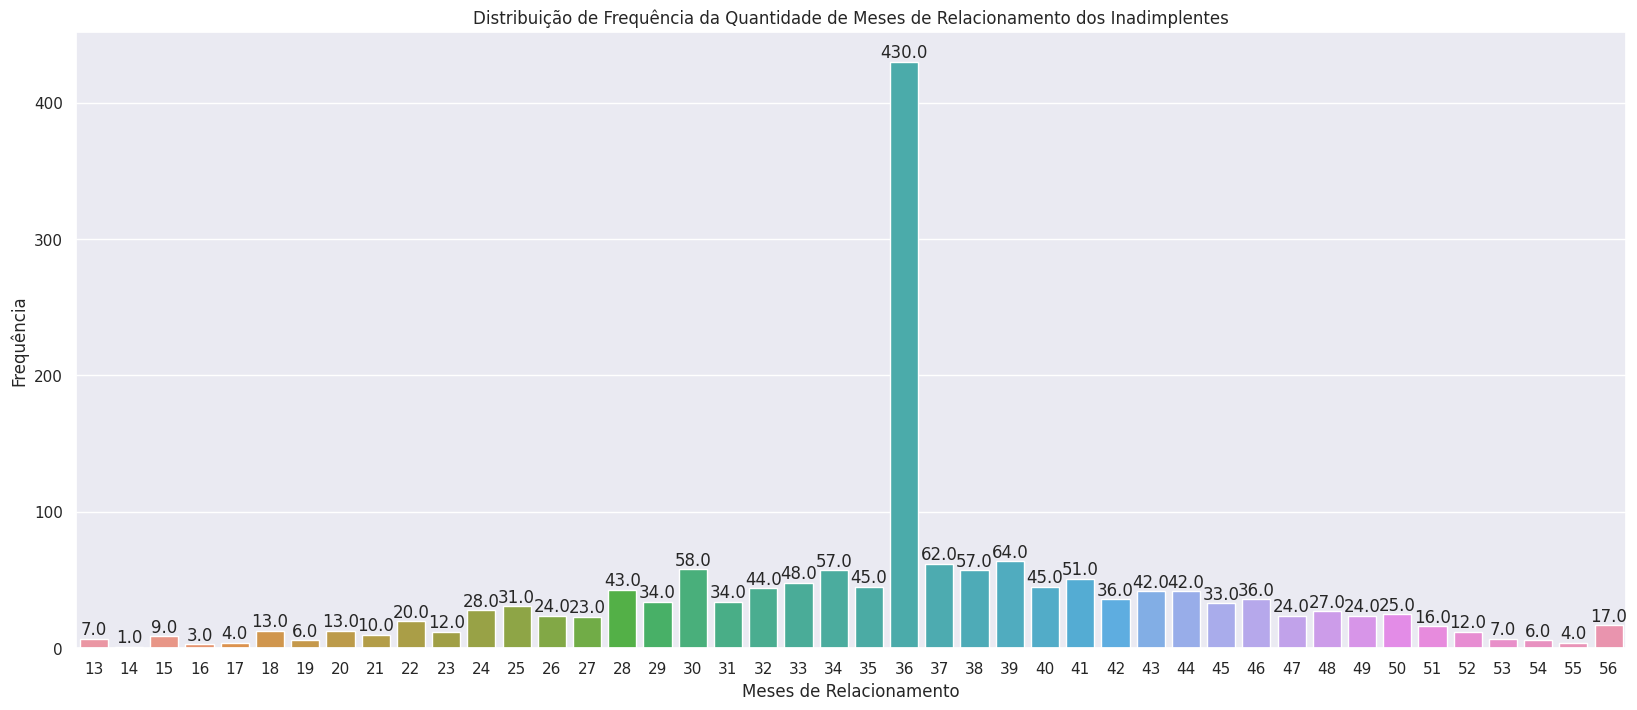

In [323]:
# Para fazer a análise gráfica da relação entre inadimplência e meses de relacionamento:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='meses_de_relacionamento', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Meses de Relacionamento dos Inadimplentes')
plt.xlabel('Meses de Relacionamento')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

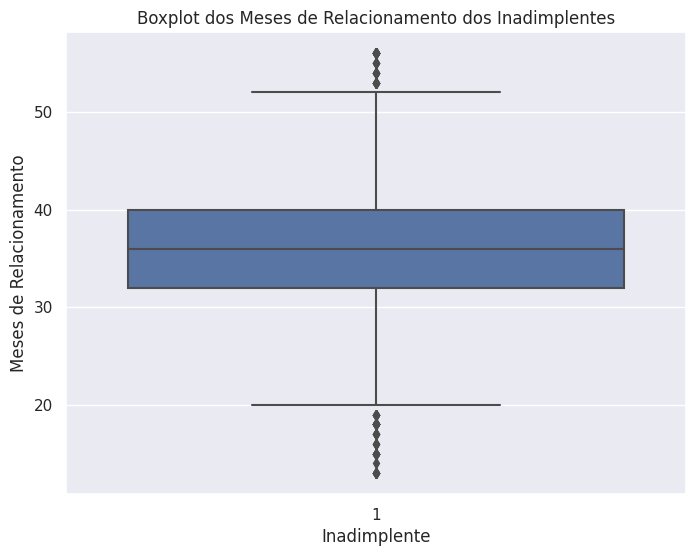

In [324]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes = df[df['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='meses_de_relacionamento', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot dos Meses de Relacionamento dos Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Meses de Relacionamento')

# Exibindo o gráfico
plt.show()

Através das **Estatísticas Descritivas**, é possível verificar que, em **média**, os clientes inadimplentes possuem **36 meses de relacionamento**, ou 3 anos.

Pela observação do **Boxplot** podemos notar a possível presença de valores **outliers**, entretanto, ao analisarmos o **gráfico** e os valores de **média**, **mediana** e **moda**, notamos que, como temos com muito mais **frequência** o valor de 36 meses dentre o tempo de relacionamento dos clientes inadimplentes, sendo esse valor também o valor da mediana, da moda e aproximadamente da média, os valores extremos encontrados abaixo e acima de 36, foram interpretados pelo Boxplot como outliers.

É recomendado averiguar a causa de tantas ocorrências de clientes inadimplentes com 36 meses de relacionamento.


.

**INADIMPLÊNCIA** **X** **QUANTIDADE** **DE** **PRODUTOS**

In [325]:
# Para ver a relação entre inadimplência e qtd_produtos:

describe_inadimplentes = inadimplentes_df['qtd_produtos'].describe()
describe_inadimplentes

count    1627.000000
mean        3.279656
std         1.577782
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: qtd_produtos, dtype: float64

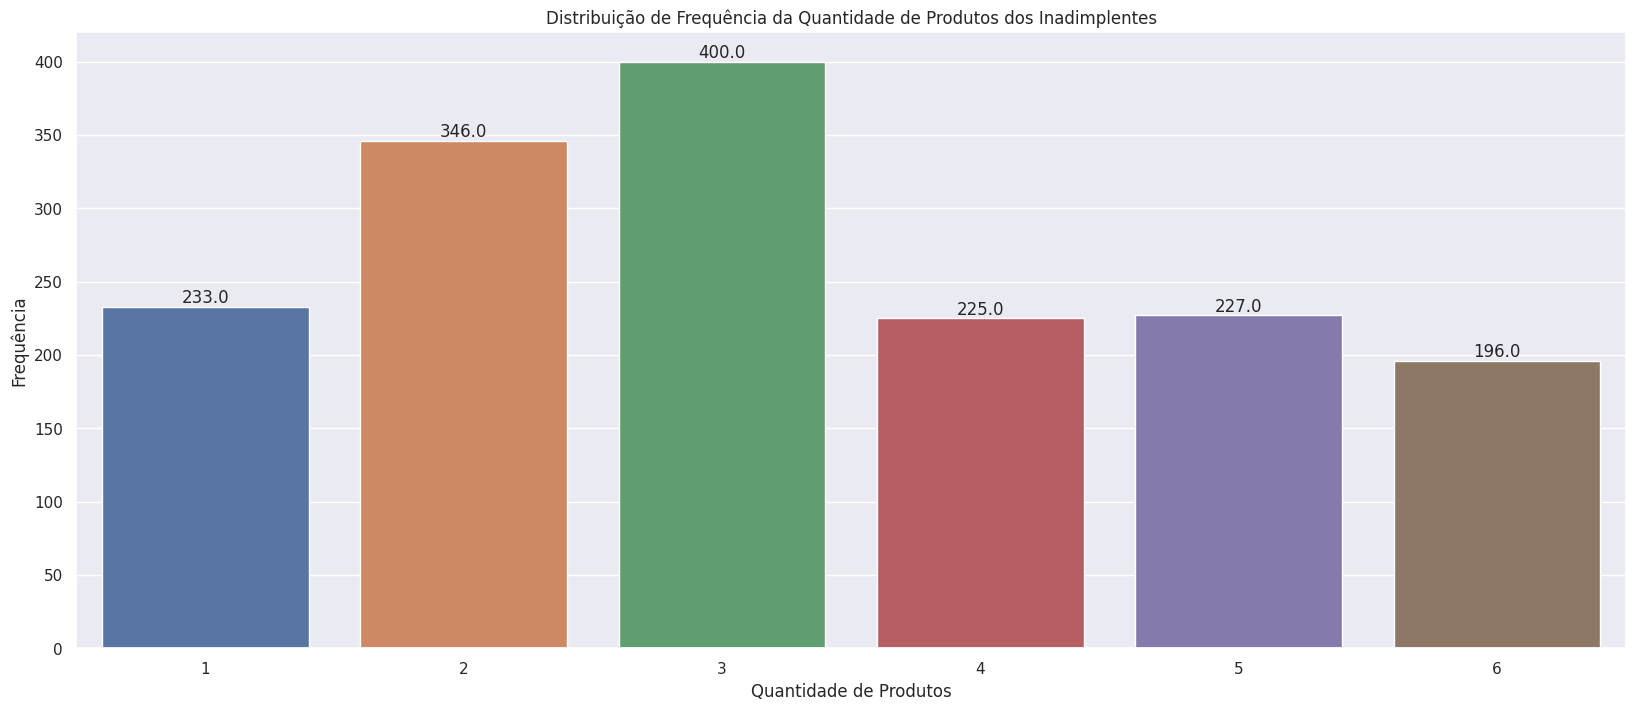

In [326]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade de produtos:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='qtd_produtos', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Produtos dos Inadimplentes')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

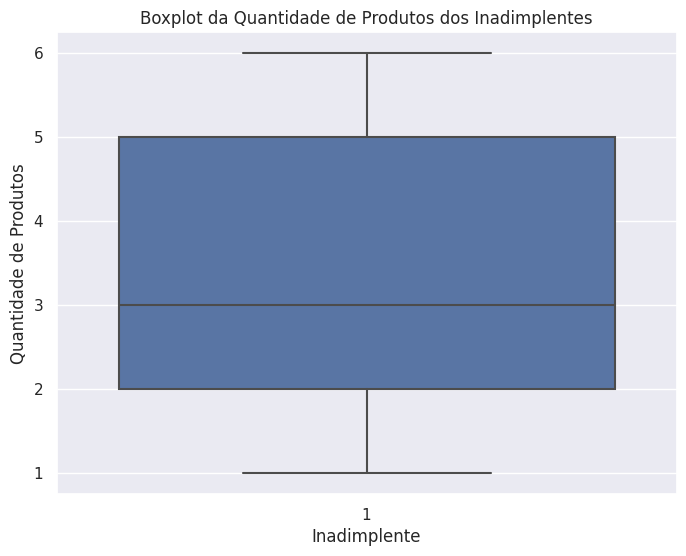

In [327]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes = df[df['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='qtd_produtos', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot da Quantidade de Produtos dos Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Quantidade de Produtos')

# Exibindo o gráfico
plt.show()

Através das **Estatísticas** **Descritivas**, é possível verificar que, em média, os clientes **inadimplentes** possuem **3 produtos**.

.

**INADIMPLÊNCIA** **X** **QUANTIDADE** **DE** **ITERAÇÕES** **EM** **1** **ANO**

In [328]:
# Para ver a relação entre a inadimplência e a quantidade de iterações com o cliente 1 ano:

describe_inadimplentes = inadimplentes_df['iteracoes_12m'].describe()
describe_inadimplentes

count    1627.000000
mean        2.972342
std         1.090537
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: iteracoes_12m, dtype: float64

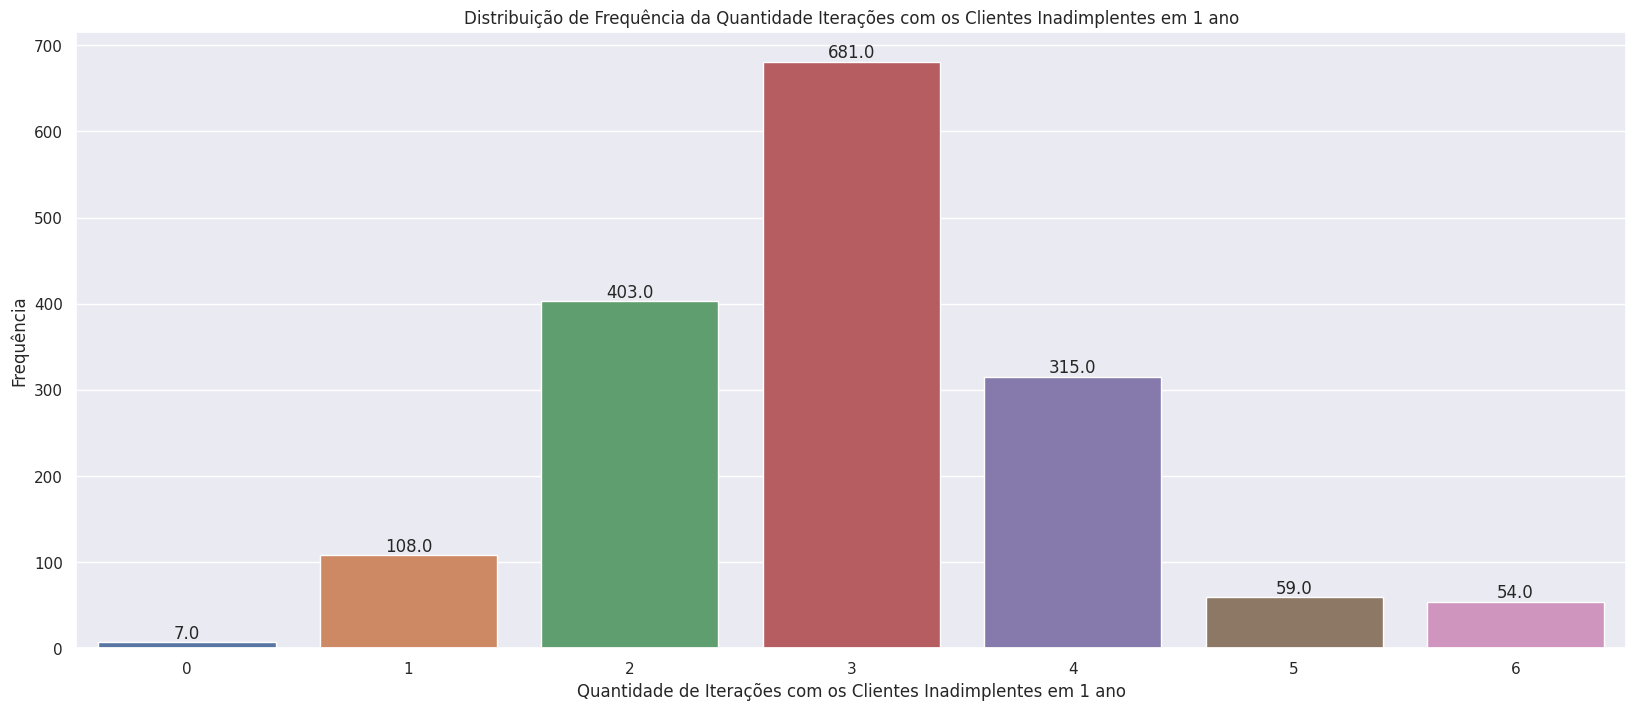

In [329]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade iterações com o cliente em 1 ano:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='iteracoes_12m', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade Iterações com os Clientes Inadimplentes em 1 ano')
plt.xlabel('Quantidade de Iterações com os Clientes Inadimplentes em 1 ano')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

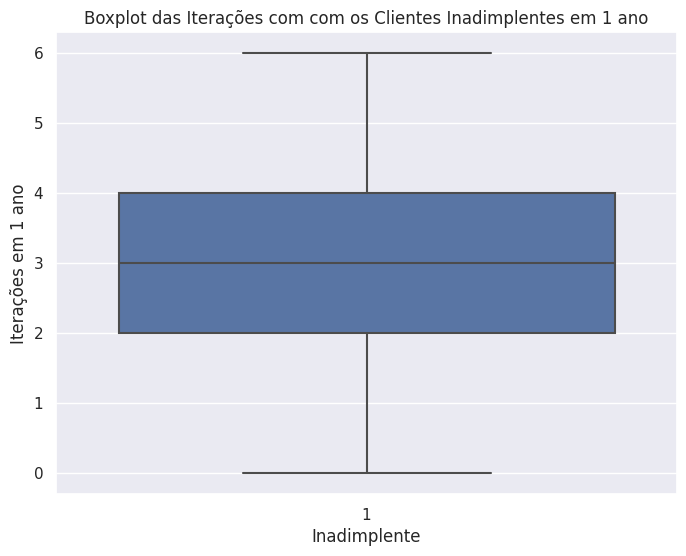

In [330]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes = df[df['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='iteracoes_12m', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot das Iterações com com os Clientes Inadimplentes em 1 ano')
plt.xlabel('Inadimplente')
plt.ylabel('Iterações em 1 ano')

# Exibindo o gráfico
plt.show()

Através das **Estatísticas** **Descritivas**, é possível verificar que, em média, a **quantidade** **de** **iterações** com os clientes inadimplentes em **1** **ano** é de **3 vezes** por ano, aproximadamente.

.

**INADIMPLÊNCIA** **X** **MESES** **DE** **INATIVIDADE** **EM** **1** **ANO**

In [331]:
# Para ver a relação entre a inadimplência e quantos meses o cliente ficou inativo em 1 ano:

describe_inadimplentes = inadimplentes_df['meses_inativo_12m'].describe()
describe_inadimplentes

count    1627.000000
mean        2.693301
std         0.899623
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: meses_inativo_12m, dtype: float64

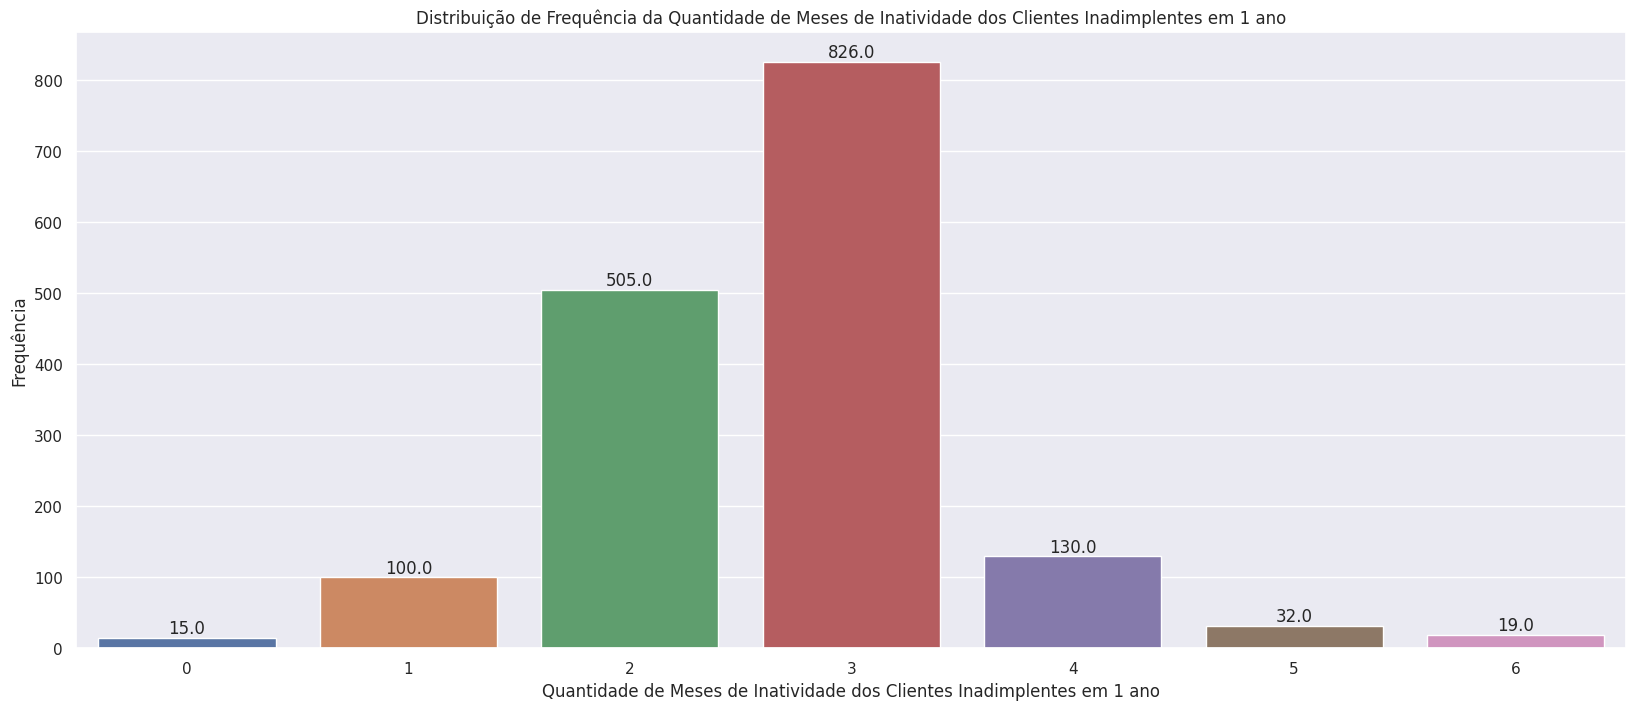

In [332]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade de meses de inatividade do cliente em 1 ano:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='meses_inativo_12m', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Meses de Inatividade dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Quantidade de Meses de Inatividade dos Clientes Inadimplentes em 1 ano')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

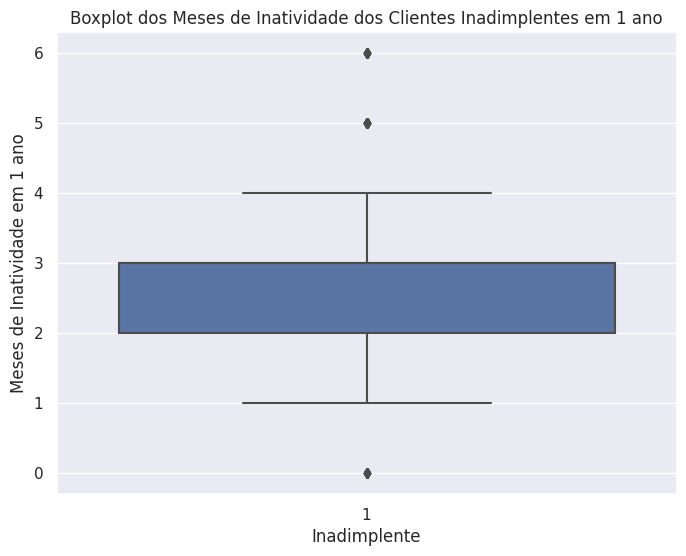

In [333]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes = df[df['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='meses_inativo_12m', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot dos Meses de Inatividade dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Inadimplente')
plt.ylabel('Meses de Inatividade em 1 ano')

# Exibindo o gráfico
plt.show()

Através das **Estatísticas** **Descritivas**, é possível verificar que, o cliente **inadimplente** fica inativo em média, **3** **meses** por ano, aproximadamente.
No **Boxplot**, notamos a **possível** **presença** de **outliers**, entretanto, é necessário investigar mais a fundo e entender a necessidade da remoção ou não desses valores.

.

**INADIMPLÊNCIA** **X** **LIMITE** **DE** **CRÉDITO**

In [334]:
# Para converter a coluna 'limite_credito' de 'object' para 'float64':

inadimplentes_df['limite_credito'] = inadimplentes_df['limite_credito'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')


<ipython-input-334-bcd92823d367>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  inadimplentes_df['limite_credito'] = inadimplentes_df['limite_credito'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')
<ipython-input-334-bcd92823d367>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inadimplentes_df['limite_credito'] = inadimplentes_df['limite_credito'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')


In [335]:
inadimplentes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1627 non-null   int64  
 1   default                  1627 non-null   int64  
 2   idade                    1627 non-null   int64  
 3   sexo                     1627 non-null   object 
 4   dependentes              1627 non-null   int64  
 5   escolaridade             1371 non-null   object 
 6   estado_civil             1498 non-null   object 
 7   salario_anual            1440 non-null   object 
 8   tipo_cartao              1627 non-null   object 
 9   meses_de_relacionamento  1627 non-null   int64  
 10  qtd_produtos             1627 non-null   int64  
 11  iteracoes_12m            1627 non-null   int64  
 12  meses_inativo_12m        1627 non-null   int64  
 13  limite_credito           1627 non-null   float64
 14  valor_transacoes_12m  

In [336]:
# Para ver a relação entre a inadimplência e o valor do limite de crédito:

describe_inadimplentes = inadimplentes_df['limite_credito'].describe()
describe_inadimplentes

count     1627.000000
mean      8136.519533
std       9095.348927
min       1438.000000
25%       2114.185000
50%       4178.030000
75%       9933.665000
max      34516.980000
Name: limite_credito, dtype: float64



Através da observação das **Estatísticas** **Descritivas**, é possível perceber que o **valor médio** do **limite** **de** **crédito** de quem está **inadimplente** é de **8136,52**.
Entretanto, em relação à **distribuição** **de** **frequências**, **50%** dos **inadimplentes** possui abaixo de **4178,00** como valor de limite de crédito e 50% possuem acima deste valor.

.

In [337]:
# Para converter a coluna 'valor_transacoes_12m' de 'object' para 'float64':

inadimplentes_df['valor_transacoes_12m'] = inadimplentes_df['valor_transacoes_12m'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')


<ipython-input-337-e81f7719b8dd>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  inadimplentes_df['valor_transacoes_12m'] = inadimplentes_df['valor_transacoes_12m'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')
<ipython-input-337-e81f7719b8dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inadimplentes_df['valor_transacoes_12m'] = inadimplentes_df['valor_transacoes_12m'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')


In [338]:
# Para ver a relação entre inadimplência e valor das transações em 1 ano:

describe_inadimplentes = inadimplentes_df['valor_transacoes_12m'].describe()
describe_inadimplentes


count     1627.000000
mean      3095.515765
std       2308.213713
min        510.160000
25%       1904.075000
50%       2329.240000
75%       2772.615000
max      10583.790000
Name: valor_transacoes_12m, dtype: float64

Com as Estatísticas Descritivas, é possível observar que o valor médio das transações dos inadimplentes em 1 ano foi de 3095,51.
Em relação à distribuição de frequências, 50% dos valores de transações dos inadimplentes estão abaixo de 2329,24 e 50% estão acima desse valor.

.

**INADIMPLÊNCIA** X **QUANTIDADE** **DE** **TRANSAÇÕES** **EM** **1** **ANO**

In [339]:
# Para ver a relação entre a inadimplência e a quantidade de transações em 1 ano:

describe_inadimplentes = inadimplentes_df['qtd_transacoes_12m'].describe()
describe_inadimplentes

count    1627.000000
mean       44.933620
std        14.568429
min        10.000000
25%        37.000000
50%        43.000000
75%        51.000000
max        94.000000
Name: qtd_transacoes_12m, dtype: float64

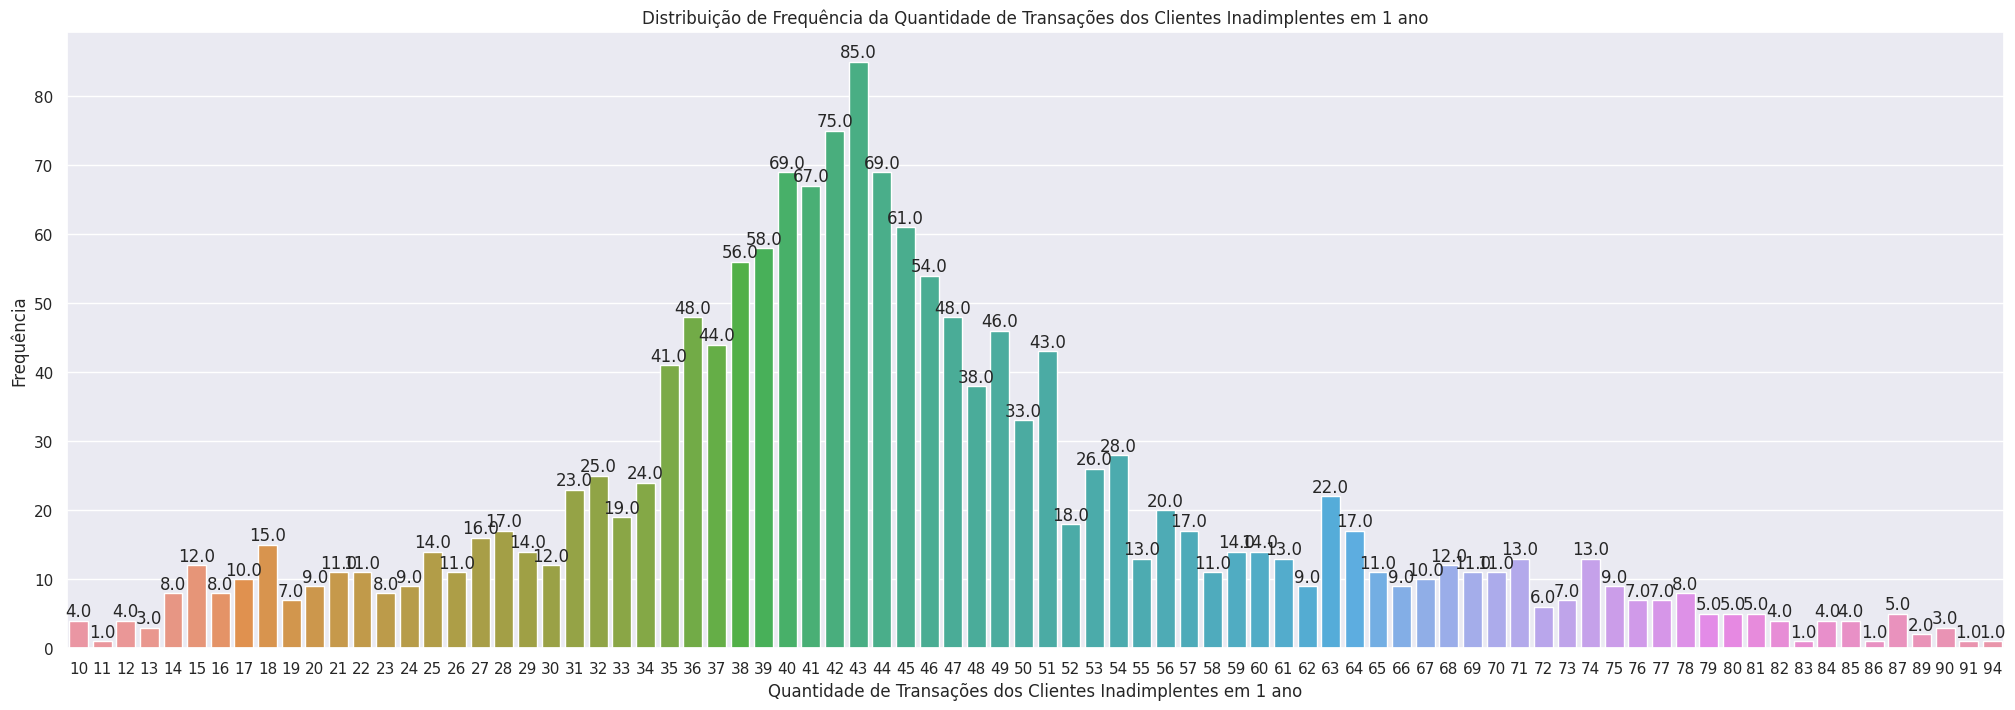

In [340]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade de transações do cliente em 1 ano:

# Definindo o tamanho da figura
plt.figure(figsize=(25, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='qtd_transacoes_12m', data=inadimplentes)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Transações dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Quantidade de Transações dos Clientes Inadimplentes em 1 ano')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

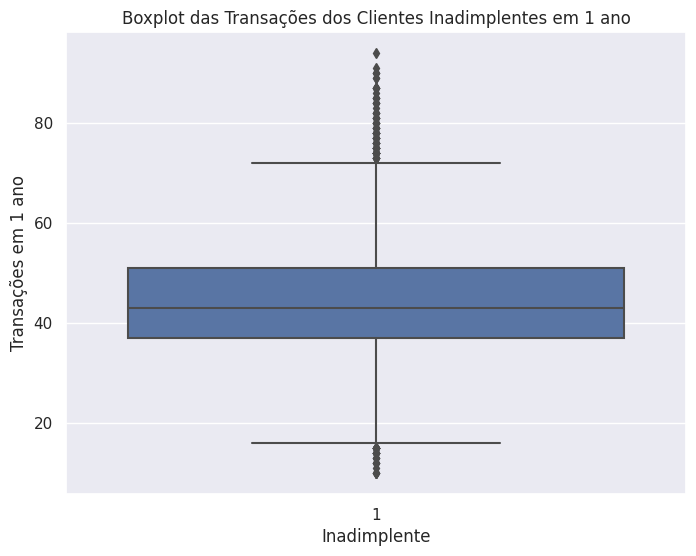

In [341]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes = df[df['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='qtd_transacoes_12m', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot das Transações dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Inadimplente')
plt.ylabel('Transações em 1 ano')

# Exibindo o gráfico
plt.show()

Através das **Estatísticas** **Descritivas**, é possível perceber que os indivíduos **inadimplentes** fizeram **em** **média** **44** **transações** em **12** **meses**.

No **gráfico**, observamos um **pico** de **ocorrência** de transações dos **inadimplentes** **no** **intervalo** de **35** **a** **51** **transações** **por** **ano**.

.

In [342]:
# Para obtermos mais informações sobre o DataFrame e verificarmos se há valores faltantes:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Observamos nas informações acima que há dados faltantes nas colunas 'escolaridade', 'estado_civil' e 'salario_anual'.

Nessa versão do Projeto de Inadimplência, iremos tratar os valores faltantes retirando esses valores e todas as linhas que tiverem esses valores faltantes como correspondentes.

Depois, iremos fazer a comparação das análises antes e depois de retirarmos os valores nulos e verificar se houve alguma alteração no resultado da análise.

Em outras versões desse projeto serão utilizadas outras técnicas mais avançadas no tratamento dos dados faltantes.

.

# Tratamento de Remoção dos Dados Faltantes

In [343]:
# Para verificar a quantidade de registros do DataFrame original antes da remoção dos dados falatantes:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [344]:
# Para criar uma cópia do DataFrame orifinal e utilizarmos essa cópia para remover os dados faltantes:

df_dropna = df.copy()


In [345]:
# Dropando as linhas que têm valores faltantes
df_dropna.dropna(inplace=True)


In [346]:
# Para verificar a quantidade de registros do DataFrame de cópia(df_dropna) depois da remoção dos dados falatantes:

df_dropna.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       7081 non-null   int64 
 1   default                  7081 non-null   int64 
 2   idade                    7081 non-null   int64 
 3   sexo                     7081 non-null   object
 4   dependentes              7081 non-null   int64 
 5   escolaridade             7081 non-null   object
 6   estado_civil             7081 non-null   object
 7   salario_anual            7081 non-null   object
 8   tipo_cartao              7081 non-null   object
 9   meses_de_relacionamento  7081 non-null   int64 
 10  qtd_produtos             7081 non-null   int64 
 11  iteracoes_12m            7081 non-null   int64 
 12  meses_inativo_12m        7081 non-null   int64 
 13  limite_credito           7081 non-null   object
 14  valor_transacoes_12m     7081 non-null 

In [347]:
# Para visualizar a quantidade total de clientes e dentre esse total
# a quantidade de adimplentes e inadimplentes e armazená-los nas suas respectivas variáveis:

novaqtd_total, _ = df_dropna.shape
novaqtd_adimplentes, _ = df_dropna[df['default'] == 0].shape
novaqtd_inadimplentes, _ = df_dropna[df_dropna['default'] == 1].shape

<ipython-input-347-a7200312aed5>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  novaqtd_adimplentes, _ = df_dropna[df['default'] == 0].shape


In [348]:
# Para imprimir na tela essas quantidades acima e suas devidas proporções:

print(f'Nova Quantidade total de Clientes: {novaqtd_total}\n')
print(f'Nova Quantidade total de Clientes Adimplentes: {novaqtd_adimplentes}')
print(f"\t- A nova proporção clientes adimplentes é de {round(100 * novaqtd_adimplentes / novaqtd_total, 2)}%\n")
print(f'Nova Quantidade total de Clientes Inadimplentes: {novaqtd_inadimplentes}')
print(f"\t- A nova proporção clientes inadimplentes é de {round(100 * novaqtd_inadimplentes / novaqtd_total, 2)}%")

Nova Quantidade total de Clientes: 7081

Nova Quantidade total de Clientes Adimplentes: 5968
	- A nova proporção clientes adimplentes é de 84.28%

Nova Quantidade total de Clientes Inadimplentes: 1113
	- A nova proporção clientes inadimplentes é de 15.72%


**Antes** da remoção de dados faltantes, a proporção de Clientes **Adimplentes** era de **83,93%** e **após** a remoção a proporção ficou em **84,28%** de Clientes **Adimplentes**.

**Antes** da remoção de dados faltantes, a proporção de Clientes **Inadimplentes** era de **16,07%** e **após** a remoção a proporção ficou em **15,72%** de Clientes Inadimplentes.

A diferença entre antes e depois da remoção é pouco expressiva em termos gerais, entretanto, iremos analisar se com a remoção ocorreu alguma alteração significativa no resultado final das análises da relação entre a inadimplência e as demais variáveis.

.

In [349]:
# Para visualizarmos as Estatísticas Descritivas do DataFrame dropado:

df_dropna.describe()

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,7.081000e+03,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,7.390919e+08,0.157181,46.347691,2.337805,35.981359,3.819376,2.454456,2.342607,64.503319
std,3.685244e+07,0.363997,8.041225,1.291649,8.002609,1.544444,1.104917,0.995104,23.809330
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130105e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,44.000000
50%,7.178438e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.732370e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,80.000000
max,8.282989e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,134.000000


.

#Explorando as Estatísticas Descritivas do DataFrame com os Dados Faltantes Removidos


* Estatísticas Descritivas Qualitativas

In [350]:
# Para visualizarmos as Estatísticas Descritivas Qualitativas:

df_dropna.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598
limite_credito,7081,6509,"1.438,33",10
valor_transacoes_12m,7081,7044,"4.141,61",2


No DataFrame **Original**, o sexo mais frequente era o **Feminino**, já no DataFrame **Dropado**, o sexo mais frequente é o Masculino.

.

* Vendo a relação entre a inadimplência e cada uma das variáveis qualitativas

**INADIMPLÊNCIA** **X** **SEXO**

In [351]:
# Para ver a relação entre a inadimplência e sexo:

df_dropna = pd.DataFrame(df_dropna)


In [352]:
## Filtrar apenas as observações dos inadimplentes (default = 1):

inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

In [353]:
## Usando o método describe para obter estatísticas descritivas dos inadimplentes:

describe_inadimplentes_dropna = inadimplentes_dropna['sexo'].describe()
describe_inadimplentes_dropna

count     1113
unique       2
top          F
freq       576
Name: sexo, dtype: object

In [354]:
# Para fazer a análise gráfica da relação entre inadimplência e sexo:

import matplotlib.pyplot as plt
import seaborn as sns


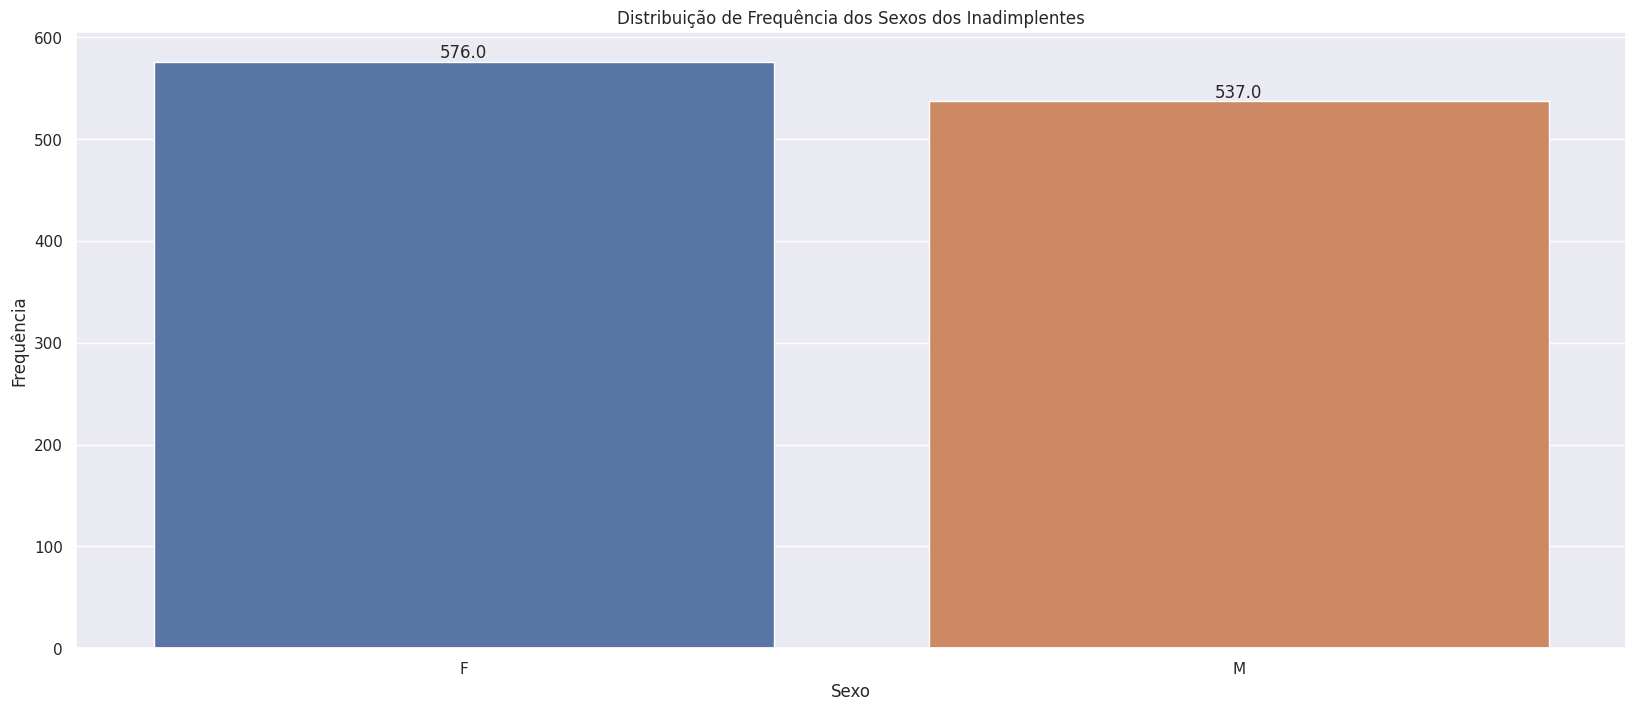

In [355]:
# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='sexo', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência dos Sexos dos Inadimplentes')
plt.xlabel('Sexo')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

No **DataFrame** **Original** observamos uma **diferença** mais **expressiva** na **frequência** **de** **observações** de **inadimplentes** **mulheres** e de **inadimplentes** **homens**, tendo obtido o quantitativo de **930** **mulheres** e **697** **homens** **inadimplentes**, tendo uma **diferença** **percentual** de aproximadamente **14%** **a** **mais** na ocorrência de **mulheres**.

Já no **DataFrame** **Dropado**, tivemos a **ocorrência** de **576** **mulheres** e **537** **homens** **inadimplentes**, obtendo a **diferença** **percentual** de aproximadamente **3%** **a** **mais** na ocorrência de **mulheres**.

.

**INADIMPLÊNCIA** **X** **ESCOLARIDADE**

In [356]:
# Para ver a relação entre a inadimplência e escolaridade:

describe_inadimplentes_dropna = inadimplentes_dropna['escolaridade'].describe()
describe_inadimplentes_dropna

count         1113
unique           5
top       mestrado
freq           406
Name: escolaridade, dtype: object

In [357]:
# Para verificar a quantidade total de registros de escolaridade 'mestrado' no DataFrame:

quantidade_mestrado_dropna = df_dropna['escolaridade'].value_counts()['mestrado']
quantidade_mestrado_dropna

2591

In [358]:
mestrado_df_dropna = df_dropna[df_dropna['escolaridade'] == 'mestrado']

In [359]:
# Para verificar dentre essa quantidade total quantos são do sexo feminino e quantas são do sexo masculino:

contagem_por_sexo_dropna = mestrado_df_dropna['sexo'].value_counts()
contagem_por_sexo_dropna

M    1337
F    1254
Name: sexo, dtype: int64

In [360]:
# Para verificarmos quantas pessoas das 487 pessoas que são inadimplentes e tem mestrado
# são mulheres(que são as mais frequentes nas inadimplencia) :

inadimplentes_mestrado_dropna = df_dropna[(df_dropna['default'] == 1) & (df_dropna['escolaridade'] == 'mestrado')]


In [361]:
## Contar o número total de inadimplentes com escolaridade 'mestrado' :

total_inadimplentes_mestrado_dropna = inadimplentes_mestrado_dropna.shape[0]
total_inadimplentes_mestrado_dropna

406

In [362]:
## Contar o número de mulheres inadimplentes com escolaridade 'mestrado':

mulheres_inadimplentes_mestrado_dropna = inadimplentes_mestrado_dropna[df_dropna['sexo'] == 'F'].shape[0]
mulheres_inadimplentes_mestrado_dropna


<ipython-input-362-9922601971ae>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mulheres_inadimplentes_mestrado_dropna = inadimplentes_mestrado_dropna[df_dropna['sexo'] == 'F'].shape[0]


226

In [363]:
# Para verificar a porcentagem de mulheres dentre os inadimplentes com metrado:

porcentagem_mulheres_inadimplentes_mestrado_dropna = (mulheres_inadimplentes_mestrado_dropna/total_inadimplentes_mestrado_dropna)*100
porcentagem_mulheres_inadimplentes_mestrado_dropna

55.66502463054187

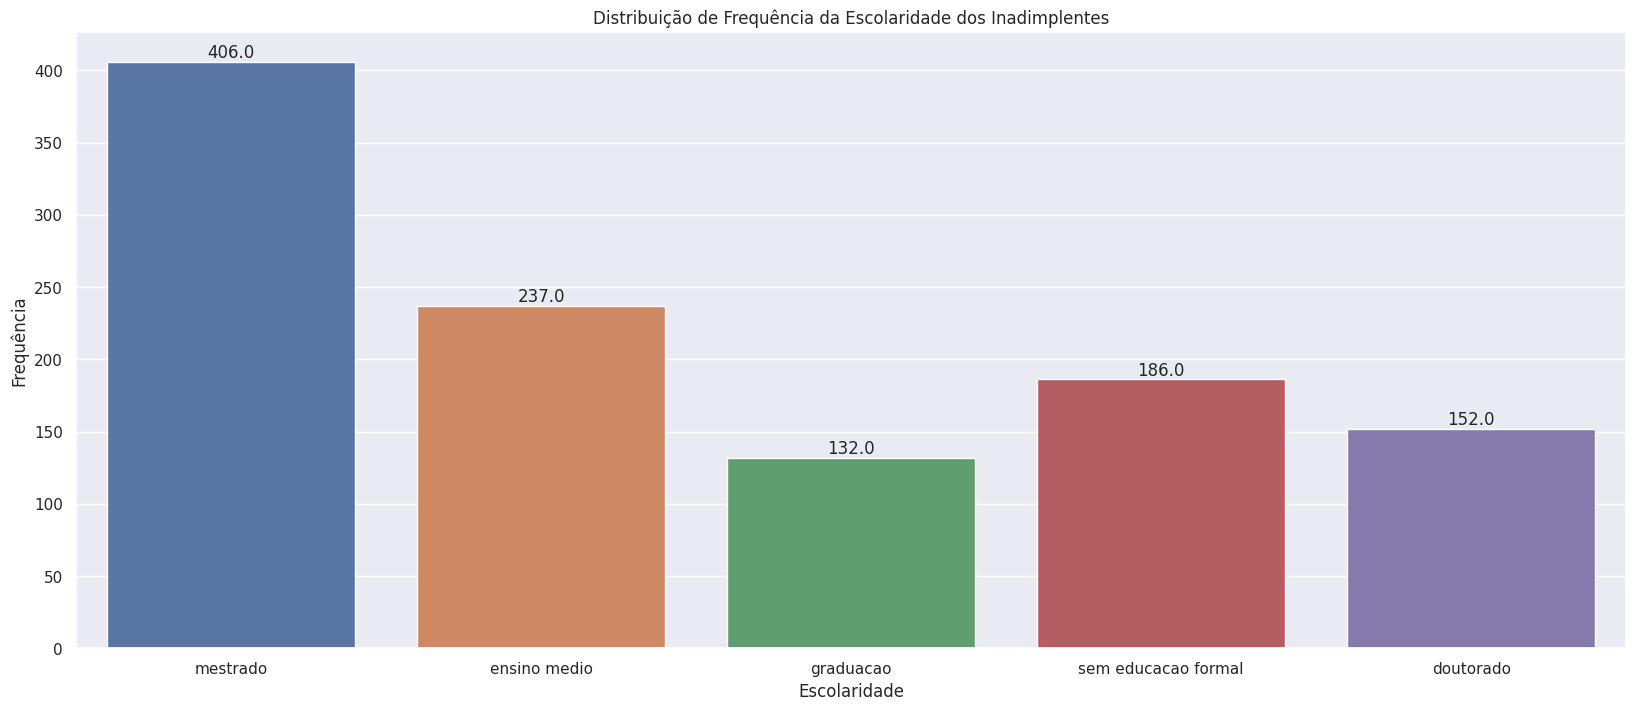

In [364]:
# Para fazer a análise gráfica da relação entre inadimplência e escolaridade:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))


## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='escolaridade', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Escolaridade dos Inadimplentes')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

No **DataFrame** **Original**, a escolaridade '**mestrado**' predominou entre os **inadimplentes** e tivemos o seguinte **quantitativo** para **escolaridade** dos **inadimplentes**: **406** para **mestrado**, **152** para **doutorado**, **132** para **graduação**, **237** para **ensino** **médio** e **186** para **sem** **educação** **formal**.

Já no **DataFrame** **Dropado**, a escolaridade '**mestrado**' permaneceu sendo a mais frequente e tivemos o seguinte **quantitativo** para **escolaridade** dos **inadimplentes**: **487** para **mestrado**, **187** para **doutorado**, **154** para **graduação**, **306** para **ensino** **médio** e **237** para  **sem** **educação** **formal**.


.

**INADIMPLÊNCIA** **X** **ESTADO** **CIVIL**

In [365]:
# Para ver a relação entre inadimplência e estado civil:

describe_inadimplentes_dropna = inadimplentes_dropna['estado_civil'].describe()
describe_inadimplentes_dropna

count       1113
unique         3
top       casado
freq         529
Name: estado_civil, dtype: object

In [366]:
# Para verificar a porcentagem de individuos casados inadimplentes
# em relação ao total de registros  de inadimplentes da coluna estado civil:

casados_df_dropna = df_dropna[df_dropna['estado_civil'] == 'casado']


In [367]:
## Contar a quantidade de casados inadimplentes:

casados_inadimplentes_dropna = casados_df_dropna['default'].sum()
casados_inadimplentes_dropna

529

In [368]:
# Contar o número total de inadimplentes:

total_inadimplentes_dropna = inadimplentes_dropna.shape[0]
total_inadimplentes_dropna

1113

In [369]:
porcentagem_casados_inadimplentes_dropna = (casados_inadimplentes_dropna / total_inadimplentes_dropna) * 100
porcentagem_casados_inadimplentes_dropna

47.52920035938904

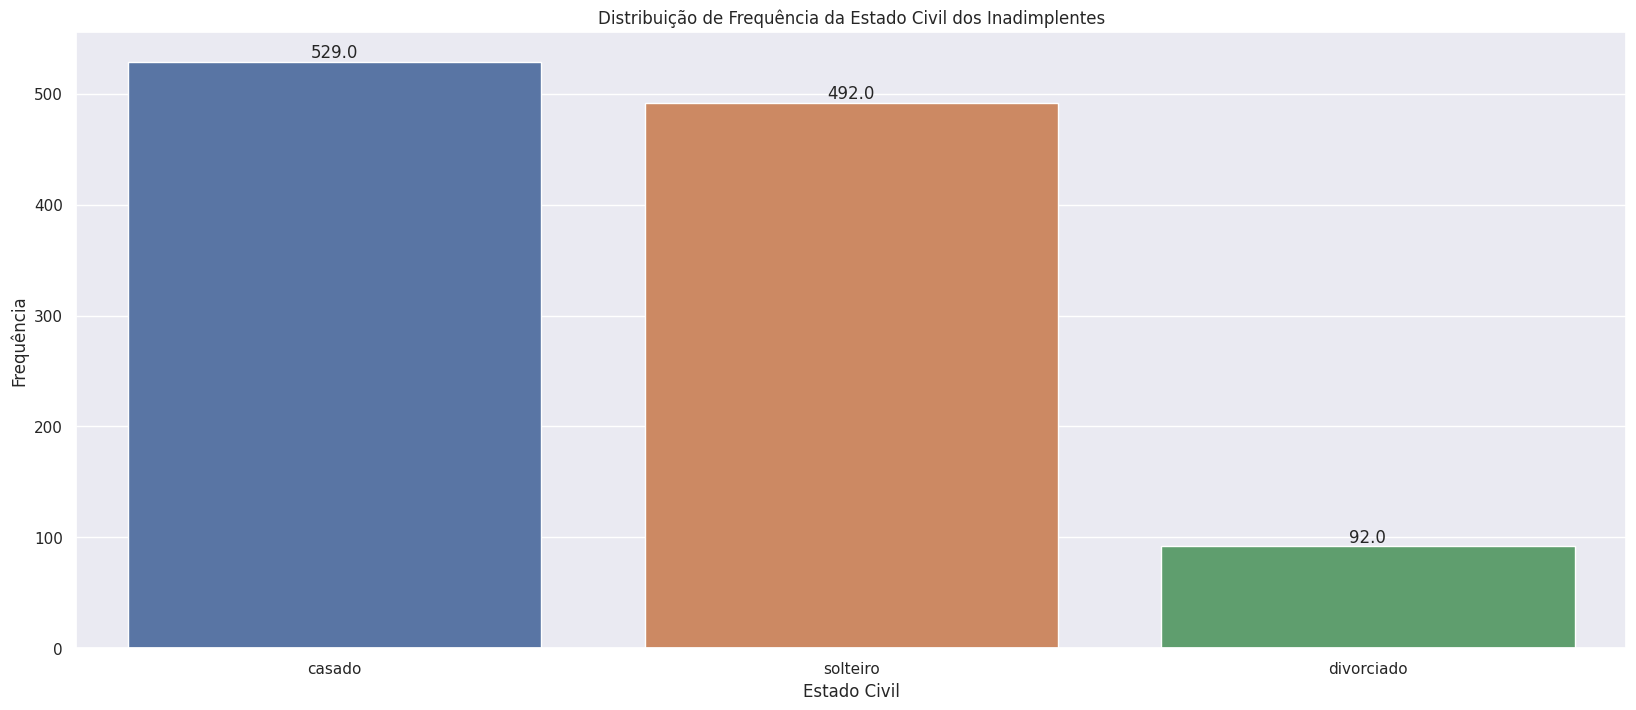

In [370]:
# Para fazer a análise gráfica da relação entre inadimplência e estado civil:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))


## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='estado_civil', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Estado Civil dos Inadimplentes')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

No **DataFrame** **Original**, o **estado** **civil** mais **frequente** entre os **inadimplentes** era o '**casado**', tendo também sido observado uma frequência alta no estado civil 'solteiro'.

Já no **DataFrame** **Dropado**, **também** ocorreu maior **frequência** no **estado** **civil** 'casado', sendo também observado no estado civil 'solteiro' uma alta frequência.

.

**INADIMPLÊNCIA** **X** **TIPO** **DE** **CARTÃO**

In [371]:
# Para ver a relação entre a inadimplência e tipo de cartão:

describe_inadimplentes_dropna = inadimplentes_dropna['tipo_cartao'].describe()
describe_inadimplentes_dropna

count     1113
unique       4
top       blue
freq      1034
Name: tipo_cartao, dtype: object

In [372]:
# Proporção da incidência do cartão 'blue' entre os inadimplentes em relação aos demais tipos:

total_inadimplentes_dropna = len(inadimplentes_dropna)
proporcao_blue_dropna = (inadimplentes_dropna['tipo_cartao'] == 'blue').sum() / total_inadimplentes_dropna * 100
proporcao_blue_dropna

92.90206648697215

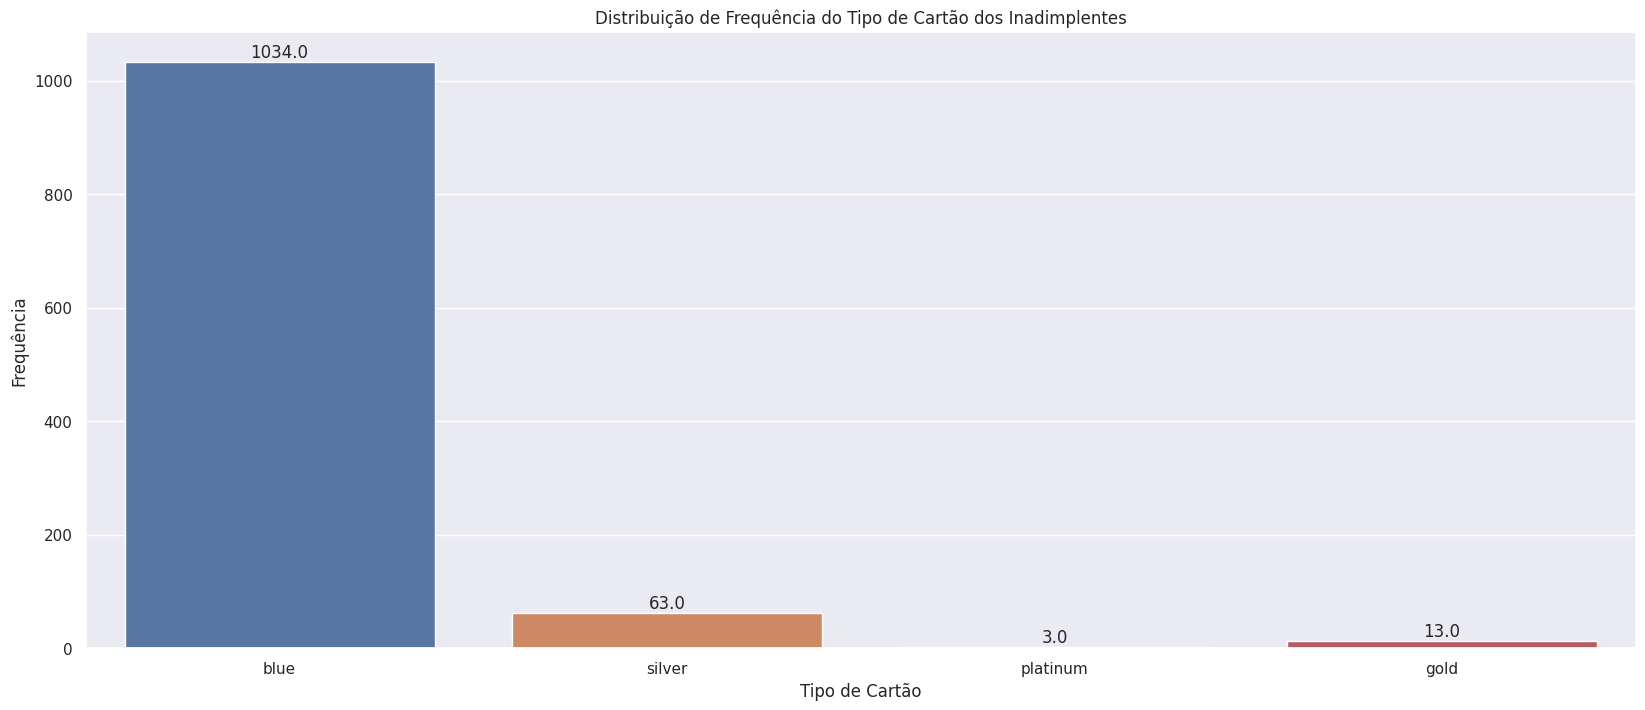

In [373]:
# Para fazer a análise gráfica da relação entre inadimplência e tipo de cartão:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))


## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='tipo_cartao', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência do Tipo de Cartão dos Inadimplentes')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

No **DataFrame** **Original**, observou o **tipo** **de** **cartão** '**blue**' como o mais **frequente** entre os **inadimplentes**.

Já no **DataFrame** **Dropado**, também foi observado o tipo de cartão '**blue**' como o mais **frequente** entre os **inadimplentes**.

.

.

* Estatísticas Descritivas Quantitativas

**INADIMPLÊNCIA** **X** **SALÁRIO** **ANUAL**

In [374]:
# Para visualizarmos as Estatísticas Descritivas Quantitativas:

df_dropna.drop('id', axis=1).select_dtypes('number').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.0,0.0,0.0,0.0,1.0
idade,7081.0,46.347691,8.041225,26.0,41.0,46.0,52.0,73.0
dependentes,7081.0,2.337805,1.291649,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,7081.0,35.981359,8.002609,13.0,31.0,36.0,40.0,56.0
qtd_produtos,7081.0,3.819376,1.544444,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,7081.0,2.454456,1.104917,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,7081.0,2.342607,0.995104,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.0,44.0,67.0,80.0,134.0


In [375]:
# Para ver a relação entre inadimplência e salário anual:

df_dropna['salario_anual'].value_counts()

menos que $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: salario_anual, dtype: int64

In [376]:
# Para ver a relação entre inadimplência e salário anual:

describe_inadimplentes_dropna = inadimplentes_dropna['salario_anual'].describe()
describe_inadimplentes_dropna

count               1113
unique                 5
top       menos que $40K
freq                 473
Name: salario_anual, dtype: object

In [377]:
# Para saber o salário médio mensal dos inadimplentes:

salario_mensal_medio_inadimplentes_dropna = inadimplentes_dropna['salario_anual'].mean() / 12
salario_mensal_medio_inadimplentes_dropna

TypeError: ignored

In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e salário anual:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='salario_anual', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência do Salário Anual dos Inadimplentes')
plt.xlabel('Salário Anual')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

No **DataFrame** **Original**, o **salário** **médio** **anual** dos **inadimplentes** é de **54.402,28**.

Já no **DataFrame** **Dropado** o **salário** **médio** **anual** dos **inadimplentes** é de **54.761,90**, uma **diferença** muito **pouco** expressiva.

.

**INADIMPLÊNCIA** **X** **IDADE**

In [ ]:
# Para ver a relação entre inadimplência e idade:

describe_inadimplentes_dropna = inadimplentes_dropna['idade'].describe()
describe_inadimplentes_dropna


In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e salário idade:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='idade', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Idade dos Inadimplentes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [ ]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='idade', data=inadimplentes_dropna)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot da Idade para Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Idade')

# Exibindo o gráfico
plt.show()

No **DataFrame** **Original**, a **média** **de** **idade** dos **idadimplentes** é de **46 anos**, aproximadamente , tendo sido observada uma **ocorrência** **maior** na faixa de idade **41 a 50 anos**.

Já no **DataFrame** **Dropado**, a **média** **de** **idade** dos **inadimplentes** também é de **46** **anos**, aproximadamente, tendo sido observada uma **ocorrência** **maior** na faixa de **40 a 54 anos**.

.

**INADIMPLÊNCIA** **X** **QUANTIDADE** **DE** **DEPENDENTES**

In [ ]:
# Para ver a relação entre inadimplência e quantidade de dependentes:

describe_inadimplentes_dropna = inadimplentes_dropna['dependentes'].describe()
describe_inadimplentes_dropna

In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e número de dependentes:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='dependentes', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência do Número de Dependentes dos Inadimplentes')
plt.xlabel('Número de Dependentes')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [ ]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='dependentes', data=inadimplentes_dropna)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot da Número de Dependentes dos Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Número de Dependentes')

# Exibindo o gráfico
plt.show()

No **DataFrame** **Original**, observou-se que, em **média**, os **inadimplentes** possuíam **2** **dependendentes**.

Já no **DataFrame** **Dropado**, obtivemos a **mesma** **observação** de **2** **dependentes** em **média**.

.

**INADIMPLÊNCIA** **X** **MESES** **DE** **RELACIONAMENTO**

In [ ]:
# Para ver a relação entre inadimplência e meses de relacionamento:

describe_inadimplentes_dropna = inadimplentes_dropna['meses_de_relacionamento'].describe()
describe_inadimplentes_dropna

In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e meses de relacionamento:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='meses_de_relacionamento', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Meses de Relacionamento dos Inadimplentes')
plt.xlabel('Meses de Relacionamento')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [ ]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='meses_de_relacionamento', data=inadimplentes_dropna)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot dos Meses de Relacionamento dos Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Meses de Relacionamento')

# Exibindo o gráfico
plt.show()

No **DataFrame** **Original** foi observado que os **iandimplentes** possuíam em **média** **36** **meses** **de** **relacionamento**.

Já no **DataFrame** **Dropado**, também foi observado o **mesmo** valor.

.

**INADIMPLÊNCIA** **X** **QUANTIDADE** **DE** **PRODUTOS**

In [ ]:
# Para ver a relação entre inadimplência e qtd_produtos:

describe_inadimplentes_dropna = inadimplentes_dropna['qtd_produtos'].describe()
describe_inadimplentes_dropna

In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade de produtos:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='qtd_produtos', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Produtos dos Inadimplentes')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [ ]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='qtd_produtos', data=inadimplentes_dropna)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot da Quantidade de Produtos dos Inadimplentes')
plt.xlabel('Inadimplente')
plt.ylabel('Quantidade de Produtos')

# Exibindo o gráfico
plt.show()

No **DataFrame** **Original** foi observado que os **inadimplentes** possuíam em **média** **3** **produtos** .

Já no **DataFrame** **Dropado** foi observada a **mesma** **quantidade**.

.

**INADIMPLÊNCIA** **X** **QUANTIDADE** **DE** **ITERAÇÕES** **EM** **1** **ANO**

In [ ]:
# Para ver a relação entre a inadimplência e a quantidade de iterações com o cliente 1 ano:

describe_inadimplentes_dropna = inadimplentes_dropna['iteracoes_12m'].describe()
describe_inadimplentes_dropna

In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade iterações com o cliente em 1 ano:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='iteracoes_12m', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade Iterações com os Clientes Inadimplentes em 1 ano')
plt.xlabel('Quantidade de Iterações com os Clientes Inadimplentes em 1 ano')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [ ]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='iteracoes_12m', data=inadimplentes)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot das Iterações com com os Clientes Inadimplentes em 1 ano')
plt.xlabel('Inadimplente')
plt.ylabel('Iterações em 1 ano')

# Exibindo o gráfico
plt.show()

No **DataFrame** **Original** foi observado que a **quantidade** **de** **iterações** com o cliente **inadimplente** foi de **3** em **média** .

Já no **DataFrame** **Dropado** foi observado a **mesma** **quantidade**.

.

**INADIMPLÊNCIA** **X** **MESES** **DE** **INATIVIDADE** **EM** **1** **ANO**

In [ ]:
# Para ver a relação entre a inadimplência e quantos meses o cliente ficou inativo em 1 ano:

describe_inadimplentes_dropna = inadimplentes_dropna['meses_inativo_12m'].describe()
describe_inadimplentes_dropna

In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade de meses de inatividade do cliente em 1 ano:

# Definindo o tamanho da figura
plt.figure(figsize=(20, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='meses_inativo_12m', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Meses de Inatividade dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Quantidade de Meses de Inatividade dos Clientes Inadimplentes em 1 ano')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [ ]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='meses_inativo_12m', data=inadimplentes_dropna)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot dos Meses de Inatividade dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Inadimplente')
plt.ylabel('Meses de Inatividade em 1 ano')

# Exibindo o gráfico
plt.show()

No **DataFrame** **Original** foi observado que os **inadimplentes** possuíam em **média** **3** **meses** de **inatividade** **em** **1** **ano** .

Já no **DataFrame** **Dropado** foi observado a **mesma** **quantidade** de meses de inatividade.

.

**INADIMPLÊNCIA** **X** **LIMITE** **DE** **CRÉDITO**

In [ ]:
# Para converter a coluna 'limite_credito' de 'object' para 'float64':

inadimplentes_dropna['limite_credito'] = inadimplentes_dropna['limite_credito'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')


In [ ]:
inadimplentes_dropna.info()

In [ ]:
# Para ver a relação entre a inadimplência e o valor do limite de crédito:

describe_inadimplentes_dropna = inadimplentes_dropna['limite_credito'].describe()
describe_inadimplentes_dropna

No **DataFrame** **Original** foi observado o valor de **8136,51** em **média** de **limite** do **cartão** dos **inadimplentes**.

Já no **DataFrame** **Dropado**, foi observado o limite médio de **8159,05**.

.

**INADIMPLÊNCIA** **X** **VALOR** **DAS** **TRANSAÇÕES** **EM** **1** **ANO**

In [ ]:
# Para converter a coluna 'valor_transacoes_12m' de 'object' para 'float64':

inadimplentes_dropna['valor_transacoes_12m'] = inadimplentes_dropna['valor_transacoes_12m'].astype(str).str.replace('.', '').str.replace(',', '.').astype('float64')


In [ ]:
# Para ver a relação entre inadimplência e valor das transações em 1 ano:

describe_inadimplentes_dropna = inadimplentes_dropna['valor_transacoes_12m'].describe()
describe_inadimplentes_dropna


No **DataFrame** **Original** foi observado o valor de transsações dos inadimplentes de **3095,51** em **média**

Já no **DataFrame** **Dropado**, foi observado o limite médio de **3106,78**.

.

**INADIMPLÊNCIA** **X** **QUANTIDADE** **DE** **TRANSAÇÕES** **EM** **1** **ANO**

In [ ]:
# Para ver a relação entre a inadimplência e a quantidade de transações em 1 ano:

describe_inadimplentes_dropna = inadimplentes_dropna['qtd_transacoes_12m'].describe()
describe_inadimplentes_dropna

In [ ]:
# Para fazer a análise gráfica da relação entre inadimplência e quantidade de transações do cliente em 1 ano:

# Definindo o tamanho da figura
plt.figure(figsize=(25, 8))

## Criando o gráfico de contagem (countplot) com seaborn
sns.set(style="darkgrid")  # Definindo o estilo do gráfico
ax = sns.countplot(x='qtd_transacoes_12m', data=inadimplentes_dropna)

## Adicionando as quantidades nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',  # Texto a ser exibido
                (p.get_x() + p.get_width() / 2, height),  # Posição do texto
                ha='center', va='bottom', fontsize=12)  # Alinhamento e tamanho da fonte

## Definindo o título e rótulos do gráfico
plt.title('Distribuição de Frequência da Quantidade de Transações dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Quantidade de Transações dos Clientes Inadimplentes em 1 ano')
plt.ylabel('Frequência')

## Exibindo o gráfico
plt.show()

In [ ]:
# Para fazer um BoxPlot:

# Filtrando apenas os inadimplentes
inadimplentes_dropna = df_dropna[df_dropna['default'] == 1]

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(x='default', y='qtd_transacoes_12m', data=inadimplentes_dropna)

# Definindo o título e os rótulos dos eixos
plt.title('Boxplot das Transações dos Clientes Inadimplentes em 1 ano')
plt.xlabel('Inadimplente')
plt.ylabel('Transações em 1 ano')

# Exibindo o gráfico
plt.show()

No **DataFrame** **Original**, foi observado em **média** **44** **transações** de **clientes** **inadimplentes**.

Já no **DataFrame** **Dropado**, foi observado a **mesma** **quantidade**.

.

# **CONCLUSÕES**

Nesse projeto buscou-se relacionar a ocorrência de inadimplência com cada variável presente no dataset, e através dos valores mais relevantes das variáveis, entender o perfil dos indivíduos inadimplentes.

Buscou-se também verificar se a remoção de valores faltantes alteraria o resultado das análises.
Conclui-se, que, com um percentual tão baixo na diferença do valor percentual da quantidade total de inadimplentes antes da remoção de dados faltantes em relação ao valor percentual da quantidade total de inadimplentes depois dessa remoção, o resultado final de cada análise, em geral, não foi alterado, havendo apenas algumas pequenas diferenças de valores no caso de variáveis quantitativas.